**<h1>Property Prices in New York : A Time Series Analysis</h1>**


**<h2>Introduction</h2>**
<p>This comprehensive project is aimed at analyzing, processing and extracting insights from data on property sales in New York city. New York is divided into 5 boroughs namely Brox, Brooklyn, Manhattan, Staten Island and Queens. Because of the amount of observations, I decided to limt the scope to only 3 boroughs namely: Brooklyn, Bronx, Manhattan. The boroughs were randomly chosen. The dataset had 314,000 observations and and 20 features. The dataset was sourced from the <a href="https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page"> NYC Department of Finance</a>  website. I selected a period of 6 years from Jan 1, 2010 to Dec 31, 2015. After going through the rigorous Exploratory Data Analysis, my number of features dropped down to 14. I  used time series analysis to extract meaningful statistics and other characteristics of the data. Specifically, looking at each borough separately and in comparison with the others, I analyzed the seasonality using first order diffencing to focus on any repeating patterns over time. I observed some interesting insights on the highest uptick and the lowest downtick at specific times over the years, consistently through most of the boroughs. I also analyzed the trend to figure out and quantify the changes over time. The trend analysis was done over a 12 month rolling average and is significant because the seasonality and noise are taken out. I also investigated the autocorrelation function to figure out whether the patterns are significant and whether they are recurrent.</p>
<p> The time series analysis instigated more questions that I felt unsupervised and supervised machine learning might answer. For the unsupervised learning, I used DBSCAN and K Means to cluster the data and try to understand what the clustes mean. I also used dimension reduction with PCA to reduce the dimensionality and visualize the clusters in 2 dimensions. Vectorization is also one of the techniques I used to visualize the clusters and compare the 2 techniques. Hierarchical clustering was also considered but dropped after constructing a dendogram and not getting distinct clusters. GMM was also considered but not used because the features were not normally distributed. </p>
<p> For the supervised learning, I put into cosideration the fact that the numerical features were highly skewed with a significant amount of outliers (particularly the sales price, land square feet and gross square feet). For this particular study, even though the property prices were highly skewed, I did not apply any techniques to deal with the outliers because that would affect the prices and the results would be unrealistic. Becuase of this, though, I used param grid to optimize the model and Mean Absolute Error to assess the performance of the algorithms used as opposed to metrics like r-squared. Due to RAM issues and computational time difficulties, I was only able to use linear regression and random forest for supervised learning but I hope to try other algorithms in future. I then did a feature importance analysis to figure out which features were most impactful in predicting the property prices. I finally examined the odds ratio to quantify the effect of a unit change on each of these features on the property prices.</p>

**<h3>Applicatibily</h3>**
<p>The end user would be financial institutions, individuals with interest in purchasing properties, property stock investors or the general population to make use of the time series model generated to forecast the future prices and know when to make decisions like buying properties, investing in stocks related to properties and mortgage loans provided.</p>  


In [1]:
# Importing ther libraries
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import math
from statsmodels.tools.eval_measures import mse, rmse
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
sns.set()
from sklearn import datasets, metrics
!pip install umap-learn
import time
from sklearn.datasets import fetch_openml
import umap
from sklearn.cluster import KMeans, MiniBatchKMeans
import scipy as sp
from scipy.cluster.vq import kmeans2
import scipy
import seaborn as sns
from sklearn.cluster import MiniBatchKMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from datetime import date
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn import ensemble
import itertools
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor 

import matplotlib
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

!pip install parfit
import parfit as pf
from parfit import bestFit # Necessary if you wish to use bestFit
# Necessary if you wish to run each step sequentially
from parfit.fit import *
from parfit.score import *
from parfit.plot import *
from parfit.crossval import *
import numpy as np
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
!pip install rfpimp
from rfpimp import permutation_importances
from sklearn.model_selection import RandomizedSearchCV

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


  Created wheel for parfit: filename=parfit-0.220-cp36-none-any.whl size=8660 sha256=228795527f1cc04c2a621c2d8c0d04a5f2e28bd68209b5890b2ad064a4e60a6c
  Stored in directory: /root/.cache/pip/wheels/d9/8a/c9/ed86e85ad0cb41ce2fdcb6bc215902dc475bd3fb1fef7c742d
Successfully built parfit
     |████████████████████████████████| 153kB 2.7MB/s 
  Created wheel for rfpimp: filename=rfpimp-1.3.5-cp36-none-any.whl size=10260 sha256=bf4a8681b3528f8587fb017e76ded8b23bfbe2ef13d2bc29c9cde199c040a87a
  Stored in directory: /root/.cache/pip/wheels/2a/c8/bf/80f91224be00870f84a85aa1782cf6cd62c1289a173b66b8e9
  Created wheel for stratx: filename=stratx-0.3-cp36-none-any.whl size=22699 sha256=80737fb06ff1e6a58f0982fc714c110ea6a381d7f541b46eda8ee96c00d16794
  Stored in directory: /root/.cache/pip/wheels/91/3b/c3/9dcafed446985efb9008de84b720ddf003ac963e6807e8ad15
Successfully built rfpimp stratx


In [2]:
#load the dataframe
from google.colab import files
uploaded = files.upload()

Saving nyc_bronx_brook_manh.csv to nyc_bronx_brook_manh.csv


In [0]:
import io
property_df= pd.read_csv(io.BytesIO(uploaded['nyc_bronx_brook_manh.csv']))
# Dataset is now stored in a Pandas Dataframe

**Exploratory Data Analysis**

In [4]:
property_df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY HOMES,1,3030,70,,A1,4445 PARK AVENUE,,10457,1,0,1,"1,694","1,497",1899,1,A1,$0,1/15/2010
1,2,BATHGATE,01 ONE FAMILY HOMES,1,3035,2,,S1,441 EAST 178 STREET,,10457,1,1,2,"1,287","2,378",1899,1,S1,"$116,000",7/1/2010
2,2,BATHGATE,01 ONE FAMILY HOMES,1,3037,42,,A1,4428 PARK AVENUE,,10457,1,0,1,"3,525","1,340",1899,1,A1,"$287,000",12/10/2010
3,2,BATHGATE,01 ONE FAMILY HOMES,1,3039,64,,A1,467 EAST 185 STREET,,10458,1,0,1,"1,667","1,296",1910,1,A1,"$150,000",4/20/2010
4,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,34,,A1,2085 BATHGATE AVENUE,,10457,1,0,1,"2,060","1,629",1899,1,A1,"$145,915",7/27/2010


In [5]:
#data types and null values
property_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314459 entries, 0 to 314458
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   BOROUGH                         314459 non-null  int64 
 1   NEIGHBORHOOD                    314459 non-null  object
 2   BUILDING CLASS CATEGORY         314459 non-null  object
 3   TAX CLASS AT PRESENT            314459 non-null  object
 4   BLOCK                           314459 non-null  int64 
 5   LOT                             314459 non-null  int64 
 6   EASE-MENT                       314459 non-null  object
 7   BUILDING CLASS AT PRESENT       314459 non-null  object
 8   ADDRESS                         314459 non-null  object
 9   APARTMENT NUMBER                314459 non-null  object
 10  ZIP CODE                        314459 non-null  int64 
 11  RESIDENTIAL UNITS               314459 non-null  object
 12  COMMERCIAL UNITS              

<b>NB: </b>
<p><b>BOROUGH:</b> A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5). 
The boroughs used are (1) , (2) and (3)

Reformat the columns to a standardized form

In [0]:

property_df.columns=property_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('__', '_').str.replace('(', '').str.replace(')', '')

In [7]:
property_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314459 entries, 0 to 314458
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   borough                         314459 non-null  int64 
 1   neighborhood                    314459 non-null  object
 2   building_class_category         314459 non-null  object
 3   tax_class_at_present            314459 non-null  object
 4   block                           314459 non-null  int64 
 5   lot                             314459 non-null  int64 
 6   ease-ment                       314459 non-null  object
 7   building_class_at_present       314459 non-null  object
 8   address                         314459 non-null  object
 9   apartment_number                314459 non-null  object
 10  zip_code                        314459 non-null  int64 
 11  residential_units               314459 non-null  object
 12  commercial_units              

In [8]:
#check if the sale date is in chronological order
property_df['sale_date'].tail(10)

314449     6/22/2015
314450     3/23/2015
314451     3/23/2015
314452     3/23/2015
314453     8/26/2015
314454     5/29/2015
314455      8/4/2015
314456     2/27/2015
314457    12/28/2015
314458     10/7/2015
Name: sale_date, dtype: object

In [9]:
#inspecting the column 'ease-ment'
property_df['ease-ment'].head(5)

0     
1     
2     
3     
4     
Name: ease-ment, dtype: object

In [0]:
#Easement is blank so I deleted it
property_df=property_df.drop(['ease-ment'],axis=1)

In [11]:
#inspecting the boroughs
property_df['borough'].nunique()

3

In [0]:
#the 3 boroughs are Bronx, Brooklyn and Manhattan

In [13]:
# missing values
property_df.isnull().sum()

borough                           0
neighborhood                      0
building_class_category           0
tax_class_at_present              0
block                             0
lot                               0
building_class_at_present         0
address                           0
apartment_number                  0
zip_code                          0
residential_units                 0
commercial_units                  0
total_units                       0
land_square_feet                  0
gross_square_feet                 0
year_built                        0
tax_class_at_time_of_sale         0
building_class_at_time_of_sale    0
sale_price                        0
sale_date                         0
dtype: int64

In [0]:
#make a copy of df1
property_df2=property_df.copy()

In [15]:
property_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314459 entries, 0 to 314458
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   borough                         314459 non-null  int64 
 1   neighborhood                    314459 non-null  object
 2   building_class_category         314459 non-null  object
 3   tax_class_at_present            314459 non-null  object
 4   block                           314459 non-null  int64 
 5   lot                             314459 non-null  int64 
 6   building_class_at_present       314459 non-null  object
 7   address                         314459 non-null  object
 8   apartment_number                314459 non-null  object
 9   zip_code                        314459 non-null  int64 
 10  residential_units               314459 non-null  object
 11  commercial_units                314459 non-null  object
 12  total_units                   

The following columns are object type , but they should be converted to numeric
I will do this by getting rid of the "$" and/or ","
<ol>
<li>-residential units
<li>-commercial units
<li>-total units
<li>-land square feet
<li>-gross square feet
-sale price</ol>


In [0]:
property_df2['residential_units']=property_df2['residential_units'].replace({',':''},regex=True).apply(pd.to_numeric,1)
property_df2['commercial_units']=property_df2['commercial_units'].replace({',':''},regex=True).apply(pd.to_numeric,1)
property_df2['total_units']=property_df2['total_units'].replace({',':''},regex=True).apply(pd.to_numeric,1)
property_df2['land_square_feet']=property_df2['land_square_feet'].replace({',':''},regex=True).apply(pd.to_numeric,1)
property_df2['gross_square_feet']=property_df2['gross_square_feet'].replace({',':''},regex=True).apply(pd.to_numeric,1)

Inspecting the sales price column

In [17]:
property_df2['sale_price']

0                 $0 
1           $116,000 
2           $287,000 
3           $150,000 
4           $145,915 
             ...     
314454           $10 
314455    $8,110,000 
314456            $0 
314457            $0 
314458       $42,000 
Name: sale_price, Length: 314459, dtype: object

Using strip and replace to remove "$" , "," and convert the sale price column to numeric

In [0]:
property_df2['sale_price']=property_df2['sale_price'].str.strip('$')
property_df2['sale_price']=property_df2['sale_price'].str.strip('-')
property_df2['sale_price']=property_df2['sale_price'].str.strip()

In [0]:
property_df2['sale_price']=property_df2['sale_price'].str.strip('$-')

property_df2['sale_price']=property_df2['sale_price'].replace({',':''},regex=True).apply(pd.to_numeric,1)

In [20]:
property_df2['sale_price']

0               0.0
1          116000.0
2          287000.0
3          150000.0
4          145915.0
            ...    
314454         10.0
314455    8110000.0
314456          0.0
314457          0.0
314458      42000.0
Name: sale_price, Length: 314459, dtype: float64

Checking again to ensure that the variables are of the correct data type

In [21]:
property_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314459 entries, 0 to 314458
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   borough                         314459 non-null  int64  
 1   neighborhood                    314459 non-null  object 
 2   building_class_category         314459 non-null  object 
 3   tax_class_at_present            314459 non-null  object 
 4   block                           314459 non-null  int64  
 5   lot                             314459 non-null  int64  
 6   building_class_at_present       314459 non-null  object 
 7   address                         314459 non-null  object 
 8   apartment_number                314459 non-null  object 
 9   zip_code                        314459 non-null  int64  
 10  residential_units               314459 non-null  int64  
 11  commercial_units                314459 non-null  int64  
 12  total_units     

Looking at the count of sales per borough

Text(0.5, 1.0, 'Count of sales per Borough')

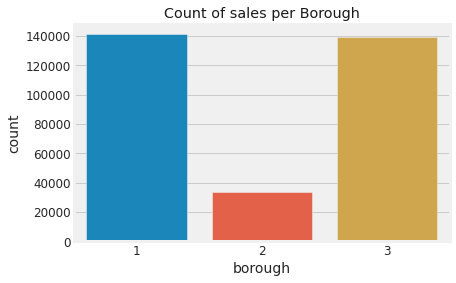

In [22]:
sns.countplot('borough',data=property_df2)
plt.title('Count of sales per Borough')

Manhattan and Brooklyn have a higher amount of properties sold compared to the Bronx.
When i compared it to the population data of the 3 boroughs, the results were very consistent. Brooklyn and Manhattan (where we see higher volume of sales ) also have a larger population compared to the Bronx (Data source: census.gov)
<ol><li>Brooklyn population 2.53 million
<li>Manhattan  1.63 million
<li>Bronx 1.42 million
</ol>

In [23]:
#null values
property_df2.isnull().sum()

borough                               0
neighborhood                          0
building_class_category               0
tax_class_at_present                  0
block                                 0
lot                                   0
building_class_at_present             0
address                               0
apartment_number                      0
zip_code                              0
residential_units                     0
commercial_units                      0
total_units                           0
land_square_feet                      0
gross_square_feet                     0
year_built                            0
tax_class_at_time_of_sale             0
building_class_at_time_of_sale        0
sale_price                        17143
sale_date                             0
dtype: int64

In [24]:
property_df2.shape

(314459, 20)

It's interesting, it says there are no null values except for the sale price column but when I skimmed the dataset I found multiple columns with zero that shouldn't. I am going to treat them as null values.(for example the year built)

In [0]:
#'zip_code', 'land_square_feet', 'gross_square_feet','year_built' cannot be zero so I am going to consider them as nulls and possibly delete

cols = ['zip_code', 'land_square_feet', 'gross_square_feet','year_built']
property_df2[cols] = property_df2[cols].replace(['0', 0, 0.0,'0.0'], np.nan)


I now have a significant amont of null values

In [26]:
# missing values
property_df2.isnull().sum()

borough                                0
neighborhood                           0
building_class_category                0
tax_class_at_present                   0
block                                  0
lot                                    0
building_class_at_present              0
address                                0
apartment_number                       0
zip_code                              72
residential_units                      0
commercial_units                       0
total_units                            0
land_square_feet                  172154
gross_square_feet                 180268
year_built                         47412
tax_class_at_time_of_sale              0
building_class_at_time_of_sale         0
sale_price                         17143
sale_date                              0
dtype: int64

I used msno.matrix to visualize the missing values and investigate if they are missing at random

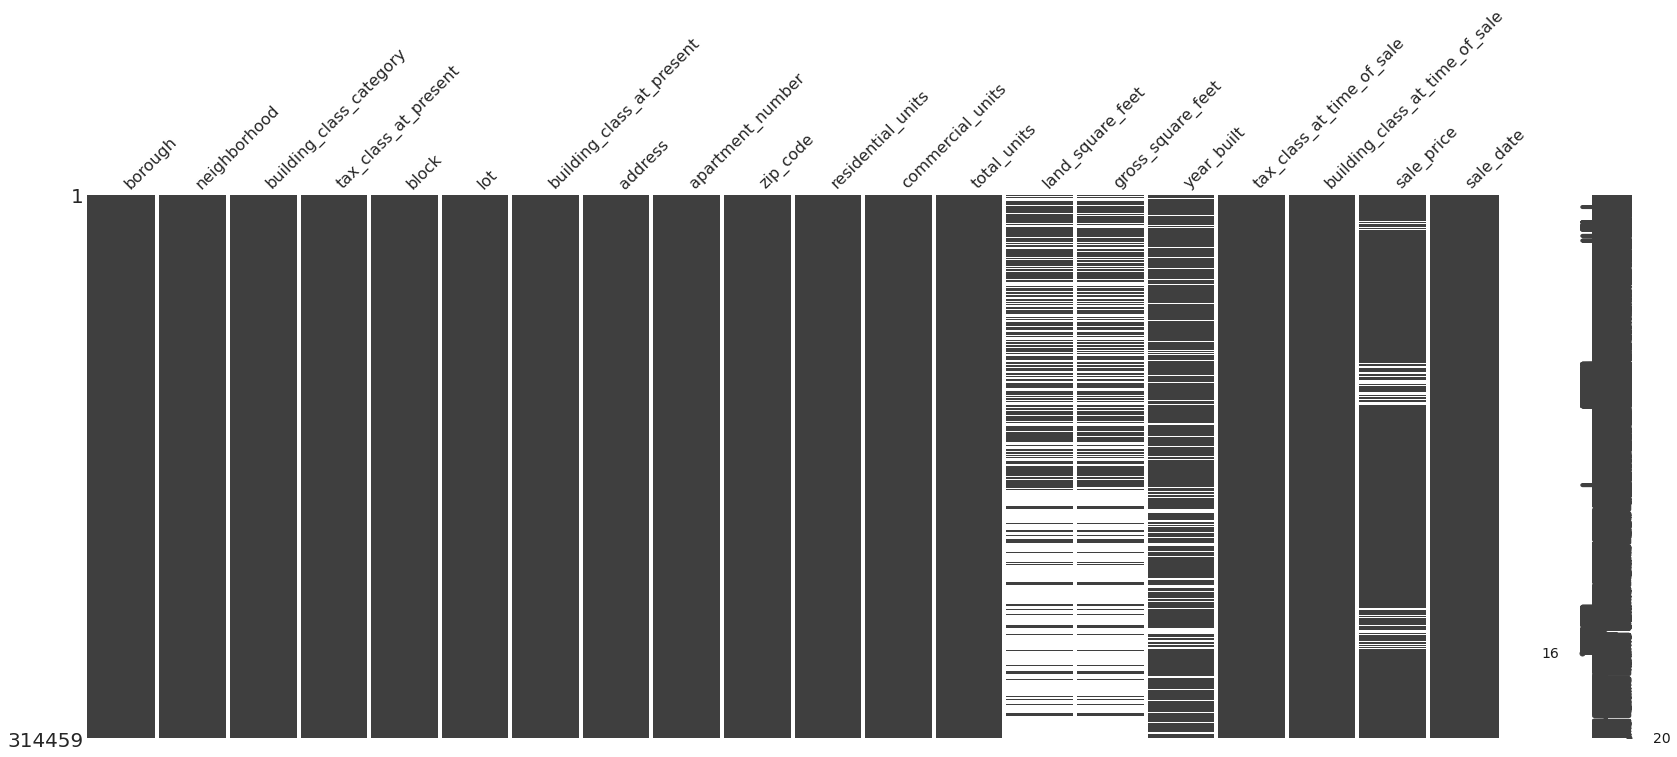

In [27]:
#see if there is null values are missing at random
msno.matrix(property_df2)

The bottom half of the dataset has a lot of missing data with regard to the gross square feet and the land square feet. These features are important and cannot be deleted


In [28]:
property_df2['sale_price'].head(30)

0          0.0
1     116000.0
2     287000.0
3     150000.0
4     145915.0
5      72790.0
6     313300.0
7     299000.0
8     132000.0
9     272231.0
10         0.0
11        10.0
12         0.0
13     88218.0
14         0.0
15    280000.0
16    187000.0
17         0.0
18         0.0
19     10000.0
20    100000.0
21         0.0
22    320000.0
23    155000.0
24    401000.0
25    136890.0
26    439633.0
27    869000.0
28         0.0
29         0.0
Name: sale_price, dtype: float64

Checking the features with the highest percentage of missing values

In [29]:
total_of_missing=property_df2.isnull().sum().sort_values(ascending=False)
percent_of_missing=(property_df2.isnull().sum()/property_df2.isnull().count()).sort_values(ascending=False)
missing_info=pd.concat([total_of_missing,percent_of_missing], axis=1, keys=['Total', 'Percent'])
missing_info.head(5)

,Total,Percent
gross_square_feet,180268,0.573264
land_square_feet,172154,0.547461
year_built,47412,0.150773
sale_price,17143,0.054516
zip_code,72,0.000229


In [30]:
property_df2.isnull().sum()

borough                                0
neighborhood                           0
building_class_category                0
tax_class_at_present                   0
block                                  0
lot                                    0
building_class_at_present              0
address                                0
apartment_number                       0
zip_code                              72
residential_units                      0
commercial_units                       0
total_units                            0
land_square_feet                  172154
gross_square_feet                 180268
year_built                         47412
tax_class_at_time_of_sale              0
building_class_at_time_of_sale         0
sale_price                         17143
sale_date                              0
dtype: int64

The sale price is the target variable  I decided to delete all null value in that column.
The gross square feet and land square feet have over 50% missing data. This is too big of a percentage to think of interpolation or imputation. Therefore I will get rid of these columns too.
Resampling is another option but I decided against it for now. If I go to the time series section and I don't see any seasonality component, then I will return and do resampling.

In [0]:
# the sale price is the target variable
# so to maintain integrity of the data, I will delete the missing values for the sale price
property_df3=property_df2.copy()
property_df3=property_df3.dropna(subset=['sale_price'])

In [0]:
property_df3=property_df3.dropna(subset=['land_square_feet'])
property_df3=property_df3.dropna(subset=['gross_square_feet'])

In [33]:
property_df3.isnull().sum()

borough                             0
neighborhood                        0
building_class_category             0
tax_class_at_present                0
block                               0
lot                                 0
building_class_at_present           0
address                             0
apartment_number                    0
zip_code                            2
residential_units                   0
commercial_units                    0
total_units                         0
land_square_feet                    0
gross_square_feet                   0
year_built                        121
tax_class_at_time_of_sale           0
building_class_at_time_of_sale      0
sale_price                          0
sale_date                           0
dtype: int64

The remaining missing values belong to the zip code and the year built.
I will drop them as the amount is really small and there is no reasonable way to deal with them at this point

In [0]:

property_df4=property_df3.copy()
property_df4=property_df4.dropna()

In [35]:
property_df4.isnull().sum()

borough                           0
neighborhood                      0
building_class_category           0
tax_class_at_present              0
block                             0
lot                               0
building_class_at_present         0
address                           0
apartment_number                  0
zip_code                          0
residential_units                 0
commercial_units                  0
total_units                       0
land_square_feet                  0
gross_square_feet                 0
year_built                        0
tax_class_at_time_of_sale         0
building_class_at_time_of_sale    0
sale_price                        0
sale_date                         0
dtype: int64

The null values have been dealt with.

In [36]:
property_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124745 entries, 0 to 314455
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   borough                         124745 non-null  int64  
 1   neighborhood                    124745 non-null  object 
 2   building_class_category         124745 non-null  object 
 3   tax_class_at_present            124745 non-null  object 
 4   block                           124745 non-null  int64  
 5   lot                             124745 non-null  int64  
 6   building_class_at_present       124745 non-null  object 
 7   address                         124745 non-null  object 
 8   apartment_number                124745 non-null  object 
 9   zip_code                        124745 non-null  float64
 10  residential_units               124745 non-null  int64  
 11  commercial_units                124745 non-null  int64  
 12  total_units     

In [37]:
#Checking the range of the sale price
property_df4['sale_price'].min(), property_df4['sale_price'].max()

(0.0, 4111111766.0)

After doing my research, I am going to take USD 100,000 as the minimum sale price. I have values of sale price as low as USD 0 and USD 1 and these are unrealistic. The general price of properties in NYC are all above USD 100,000. So I retained only properties that are USD 100,000 and above sale price.

In [0]:

over100k= property_df4['sale_price'] > 100000
property_df5=property_df4.iloc[over100k.values]

In [39]:
property_df5.head(5)

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
1,2,BATHGATE,01 ONE FAMILY HOMES,1,3035,2,S1,441 EAST 178 STREET,,10457.0,1,1,2,1287.0,2378.0,1899.0,1,S1,116000.0,7/1/2010
2,2,BATHGATE,01 ONE FAMILY HOMES,1,3037,42,A1,4428 PARK AVENUE,,10457.0,1,0,1,3525.0,1340.0,1899.0,1,A1,287000.0,12/10/2010
3,2,BATHGATE,01 ONE FAMILY HOMES,1,3039,64,A1,467 EAST 185 STREET,,10458.0,1,0,1,1667.0,1296.0,1910.0,1,A1,150000.0,4/20/2010
4,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,34,A1,2085 BATHGATE AVENUE,,10457.0,1,0,1,2060.0,1629.0,1899.0,1,A1,145915.0,7/27/2010
6,2,BATHGATE,01 ONE FAMILY HOMES,1,3048,18,A9,2184 BATHGATE AVENUE,,10457.0,1,0,1,1768.0,1236.0,1930.0,1,A9,313300.0,4/9/2010


In [40]:
#look at the numeric columns left
numeric_columns=property_df5.select_dtypes(["float",'int']).columns
print(numeric_columns)

Index(['borough', 'block', 'lot', 'zip_code', 'residential_units',
       'commercial_units', 'total_units', 'land_square_feet',
       'gross_square_feet', 'year_built', 'tax_class_at_time_of_sale',
       'sale_price'],
      dtype='object')


The column below( tax class at time of sale) is numeric type but instead should be categorical

In [41]:

property_df5['tax_class_at_time_of_sale'].dtype

dtype('int64')

In [0]:
 property_df5['tax_class_at_time_of_sale']= property_df5['tax_class_at_time_of_sale'].astype(str)

In [43]:
property_df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69608 entries, 1 to 314455
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   borough                         69608 non-null  int64  
 1   neighborhood                    69608 non-null  object 
 2   building_class_category         69608 non-null  object 
 3   tax_class_at_present            69608 non-null  object 
 4   block                           69608 non-null  int64  
 5   lot                             69608 non-null  int64  
 6   building_class_at_present       69608 non-null  object 
 7   address                         69608 non-null  object 
 8   apartment_number                69608 non-null  object 
 9   zip_code                        69608 non-null  float64
 10  residential_units               69608 non-null  int64  
 11  commercial_units                69608 non-null  int64  
 12  total_units                    

**Distribution**
<p>I look at the distribution of the major numerical columns

In [0]:
numeric=property_df5[['land_square_feet', 'gross_square_feet', 'sale_price']]

In [0]:
# distribution of the continuous variables
def histograms_plot(dataframe, features, rows, cols):
 fig=plt.figure(figsize=(20,20))
 for i, feature in enumerate(features):
     ax=fig.add_subplot(rows,cols,i+1)
     dataframe[feature].hist(bins=10,ax=ax,facecolor='green')
     ax.set_title(feature+" Distribution",color='red')

 fig.tight_layout()  
 plt.show()

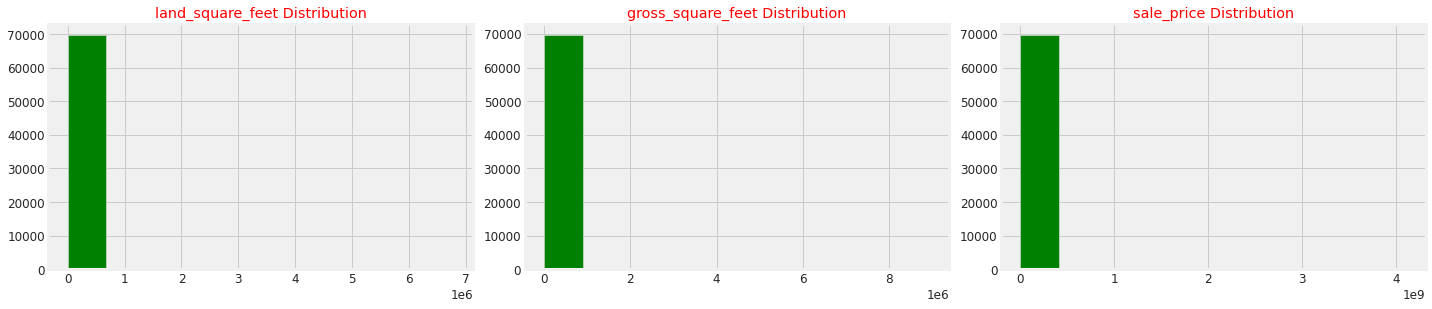

In [46]:
histograms_plot(numeric,numeric.columns,5,3)

The distribution is not a normal one. Having just one bar means we have outliers in form of large values which are skewing the data. Because  I may need the outliers for the accuracy of my time series analysis, I will leave the outliers. This is why I used MAE as the performance metric rather that r-squared.

In [47]:
# the range of the feature 'lot'
property_df5['lot'].min(), property_df5['lot'].max()

(1, 9001)

**Outliers**

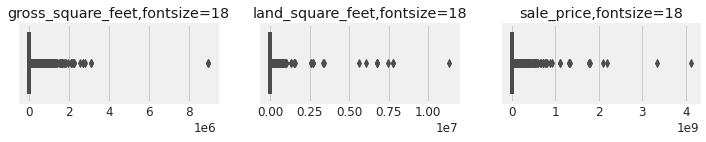

In [48]:
#outliers
list=['gross_square_feet', 'land_square_feet', 'sale_price']
plt.figure(figsize=(10,5))
for i, col in enumerate(list):
  plt.subplot(len(list), 3, i+1)
  sns.boxplot(property_df2[col], color=('cyan'))
  plt.title(f'{col},fontsize=18')
  plt.xlabel('')

plt.tight_layout()
plt.show()

In [0]:
# the outliers contain very important information and can't be dropped in this case

In [0]:

#drop the column "ease-ment" it appers to have no contents
#also, I dont see the apartment number being useful so I drop it
#same applies to the address
property_df5=property_df5.drop(['apartment_number', 'address'], axis=1)

In [51]:
property_df5['residential_units'].dtype

dtype('int64')

In [52]:
property_df5['commercial_units'].nunique()

96

For purposes of drawing my heatmap, I one hot encode all the categorial variables left.

In [0]:

property_df51=property_df5.copy()
property_df51=property_df51.drop(['sale_date'],axis=1)
property_df51['neighborhood'] =  label_encoder.fit_transform(property_df51['neighborhood'])
property_df51['building_class_category'] =label_encoder.fit_transform(property_df51['building_class_category'])
property_df51['tax_class_at_present'] =  label_encoder.fit_transform(property_df51['tax_class_at_present'])
property_df51['tax_class_at_time_of_sale'] =  label_encoder.fit_transform(property_df51['tax_class_at_time_of_sale'])
property_df51['building_class_at_present'] =  label_encoder.fit_transform(property_df51['building_class_at_present'])
property_df51['building_class_at_time_of_sale'] =  label_encoder.fit_transform(property_df51['building_class_at_time_of_sale'])

In [54]:
property_df51.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69608 entries, 1 to 314455
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   borough                         69608 non-null  int64  
 1   neighborhood                    69608 non-null  int64  
 2   building_class_category         69608 non-null  int64  
 3   tax_class_at_present            69608 non-null  int64  
 4   block                           69608 non-null  int64  
 5   lot                             69608 non-null  int64  
 6   building_class_at_present       69608 non-null  int64  
 7   zip_code                        69608 non-null  float64
 8   residential_units               69608 non-null  int64  
 9   commercial_units                69608 non-null  int64  
 10  total_units                     69608 non-null  int64  
 11  land_square_feet                69608 non-null  float64
 12  gross_square_feet              

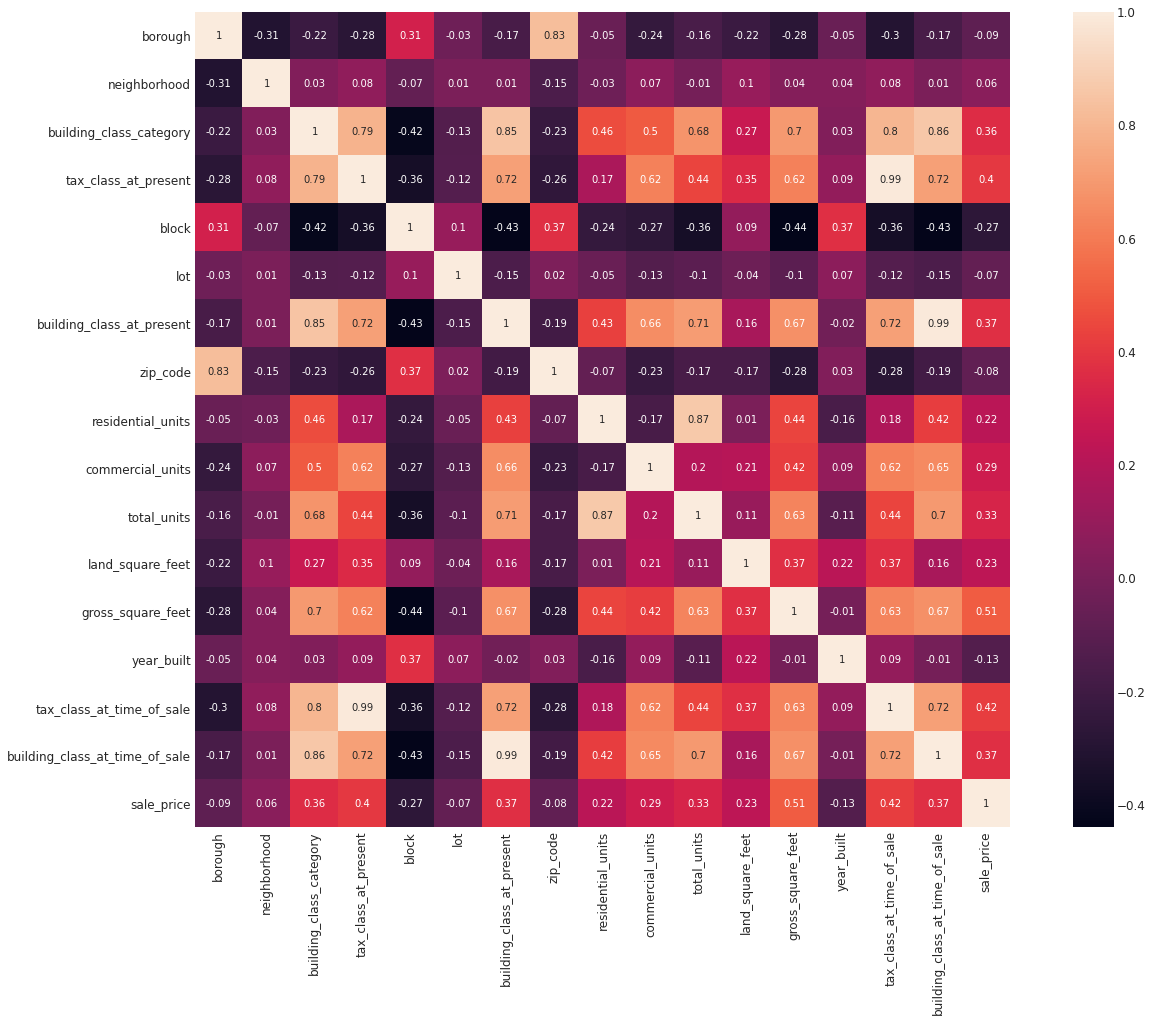

In [55]:
plt.figure(figsize=(20,15))
corrmat=property_df51.corr(method ='spearman').round(2)
sns.heatmap(corrmat, square=True, annot=True,xticklabels=True, vmax=1, yticklabels=True)

**VIF**
<p>From the heatmap, I can see that some features are highly correlated. Using the heatmap and through performing VIF, I determine which features whould be eliminated because they basically contain very similar information about the variance of the dataset.


In [56]:
#Writing a function to calculate the VIF values for numeric datasets
def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)
vif_cal(input_data=property_df51, dependent_col="sale_price")

borough  VIF =  59.42
neighborhood  VIF =  1.11
building_class_category  VIF =  14.29
tax_class_at_present  VIF =  14.88
block  VIF =  1.41
lot  VIF =  1.03
building_class_at_present  VIF =  26.66
zip_code  VIF =  57.7
residential_units  VIF =  54800.75
commercial_units  VIF =  1207.56
total_units  VIF =  56411.46
land_square_feet  VIF =  1.26
gross_square_feet  VIF =  2.74
year_built  VIF =  1.17
tax_class_at_time_of_sale  VIF =  28.31
building_class_at_time_of_sale  VIF =  26.67


Using the information from the heatmap and the VIF, I decided to delete the following columns:
<p>building class category, building class at time of sale,tax class at time of sale,total units,tax class at present

In [0]:
property_df51=property_df51.drop(['building_class_category','building_class_at_time_of_sale','tax_class_at_time_of_sale','total_units','tax_class_at_present'], axis=1)

In [58]:
#label encoding the borough
dummy=pd.get_dummies(property_df51['borough'])
dummy.head()

,1,2,3
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
6,0,1,0


In [0]:
property_df51=pd.concat([property_df51, dummy], axis=1)

In [0]:
property_df51=property_df51.drop(['borough'], axis=1)

In [0]:
property_df51.rename(columns={1:'borough_manhattan',
                          2:'borough_brox',
                          3:'brooklyn'}, 
                 inplace=True)

In [62]:
property_df51.head(2)

,neighborhood,block,lot,building_class_at_present,zip_code,residential_units,commercial_units,land_square_feet,gross_square_feet,year_built,sale_price,borough_manhattan,borough_brox,brooklyn
1,2,3035,2,127,10457.0,1,1,1287.0,2378.0,1899.0,116000.0,0,1,0
2,2,3037,42,1,10457.0,1,0,3525.0,1340.0,1899.0,287000.0,0,1,0


In [63]:
property_df51['sale_price'].mean()

3001602.3199488563

In [0]:
#BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

**Time Series Analysis**

In the time series analysis, I begin by retaining the 2 relevant features: date and sale price. I then subdivide the data according to borough, and then convert the data format to date time to prepare it for analysis.

In [0]:
#converting sale date to datetime
property_df6=property_df5.copy()
property_df6['sale_date']= pd.to_datetime(property_df6['sale_date'], errors='coerce')
property_df6.sort_values(by=['sale_date'], inplace=True, ascending=True)


In [66]:
property_df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69608 entries, 44391 to 160707
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   borough                         69608 non-null  int64         
 1   neighborhood                    69608 non-null  object        
 2   building_class_category         69608 non-null  object        
 3   tax_class_at_present            69608 non-null  object        
 4   block                           69608 non-null  int64         
 5   lot                             69608 non-null  int64         
 6   building_class_at_present       69608 non-null  object        
 7   zip_code                        69608 non-null  float64       
 8   residential_units               69608 non-null  int64         
 9   commercial_units                69608 non-null  int64         
 10  total_units                     69608 non-null  int64         
 1

In [67]:
property_df6['borough'].unique()

array([3, 1, 2])

Plotting the gross square feet with the sale price. The relationship is close to linear

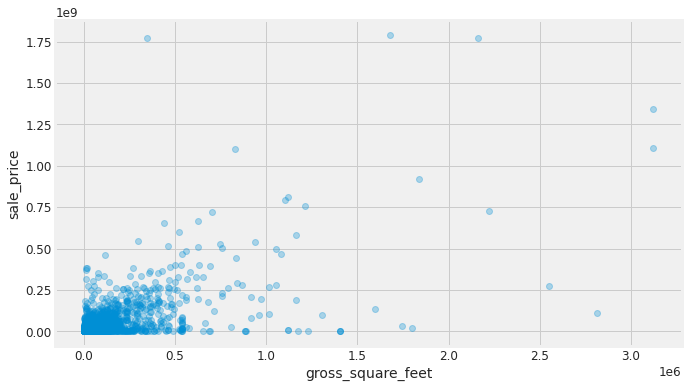

In [68]:
gsf=property_df6[property_df6['gross_square_feet']<4e6]
plt.figure(figsize=(10,6))
sns.regplot(x='gross_square_feet', y='sale_price', data=gsf, fit_reg=False, scatter_kws={'alpha':0.3});

Plotting the land square feet with the sale price. As expected a slight increase in the land square feet results into a substantially greater increase in the sale price because New York has a high population density and the price of land square footage is the highest in the US and 8th highest in the world.( source: statistica.com)

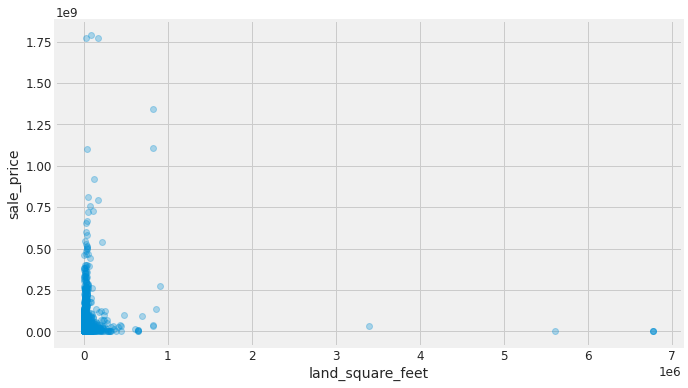

In [69]:
gsf=property_df6[property_df6['gross_square_feet']<4e6]
plt.figure(figsize=(10,6))
sns.regplot(x='land_square_feet', y='sale_price', data=gsf, fit_reg=False, scatter_kws={'alpha':0.3});

In [70]:
#Checking how many zip codes we have
property_df6['zip_code'].nunique()

108

Text(0.5, 1.0, 'Sales per borough for Residential Properties')

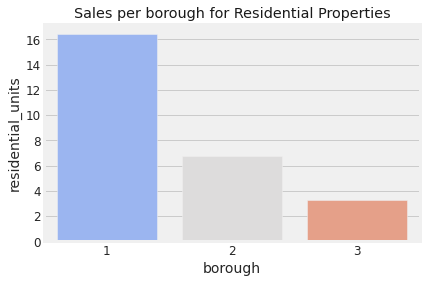

In [71]:
#Sales volume per borough for residential units
sns.barplot(y='residential_units', x='borough',data=property_df6, palette='coolwarm', ci=None)
plt.title('Sales per borough for Residential Properties')

In [0]:
#Retaining only the time series data
ts1=property_df6[['sale_date','sale_price']]

In [0]:
#break it down to 3 boroughs
brx=property_df6['borough']==2
brln=property_df6['borough']==3
mhtn=property_df6['borough']==1
bronx_ts=property_df6.iloc[brx.values]
brooklyn_ts=property_df6.iloc[brln.values]
manhattan_ts=property_df6.iloc[mhtn.values]

Narrow down to the time series data per borough

In [0]:

bronx_ts=bronx_ts[['sale_date','sale_price']]
brooklyn_ts=brooklyn_ts[['sale_date','sale_price']]
manhattan_ts=manhattan_ts[['sale_date','sale_price']]

Order it by date time and make the index the date column per borough

In [0]:
bronx_ts['sale_date']= pd.to_datetime(bronx_ts['sale_date'], errors='coerce')
bronx_ts.sort_values(by=['sale_date'], inplace=True, ascending=True)

brooklyn_ts['sale_date']= pd.to_datetime(brooklyn_ts['sale_date'], errors='coerce')
brooklyn_ts.sort_values(by=['sale_date'], inplace=True, ascending=True)

manhattan_ts['sale_date']= pd.to_datetime(manhattan_ts['sale_date'], errors='coerce')
manhattan_ts.sort_values(by=['sale_date'], inplace=True, ascending=True)

**Sale_date ranges per borough**

In [76]:

print(bronx_ts['sale_date'].min(), bronx_ts['sale_date'].max())
print(brooklyn_ts['sale_date'].min(), brooklyn_ts['sale_date'].max())
print(manhattan_ts['sale_date'].min(), manhattan_ts['sale_date'].max())

2010-01-03 00:00:00 2015-12-31 00:00:00
2010-01-01 00:00:00 2015-12-31 00:00:00
2010-01-02 00:00:00 2015-12-31 00:00:00


**Sale price ranges per borough**

In [77]:

print(bronx_ts['sale_price'].min(), bronx_ts['sale_price'].max())
print(brooklyn_ts['sale_price'].min(), brooklyn_ts['sale_price'].max())
print(manhattan_ts['sale_price'].min(), manhattan_ts['sale_price'].max())

100443.0 137298279.0
100500.0 276947000.0
100009.0 4111111766.0


**Maximum sale price**
<p>Bronx 137,298,279.0</p>
<p>Brooklyn  276,947,000</p>
<p>Manhattan 4,111,111,766</p>

In [0]:
#group by sale date and sum up the sale price
bronx_ts=bronx_ts.groupby('sale_date')['sale_price'].sum().reset_index()
bronx_ts=bronx_ts.set_index('sale_date')
brooklyn_ts=brooklyn_ts.groupby('sale_date')['sale_price'].sum().reset_index()
brooklyn_ts=brooklyn_ts.set_index('sale_date')
manhattan_ts=manhattan_ts.groupby('sale_date')['sale_price'].sum().reset_index()
manhattan_ts=manhattan_ts.set_index('sale_date')

In [0]:
bronx= bronx_ts['sale_price'].resample('MS').mean()
brooklyn=brooklyn_ts['sale_price'].resample('MS').mean()
manhattan=manhattan_ts['sale_price'].resample('MS').mean()

In [80]:
bronx

sale_date
2010-01-01    3.526537e+06
2010-02-01    4.077280e+06
2010-03-01    4.112898e+06
2010-04-01    6.651510e+06
2010-05-01    1.080298e+07
                  ...     
2015-08-01    9.281355e+06
2015-09-01    2.481809e+07
2015-10-01    2.389901e+07
2015-11-01    1.242147e+07
2015-12-01    1.509517e+07
Freq: MS, Name: sale_price, Length: 72, dtype: float64

**Plotting the time series for the Bronx**

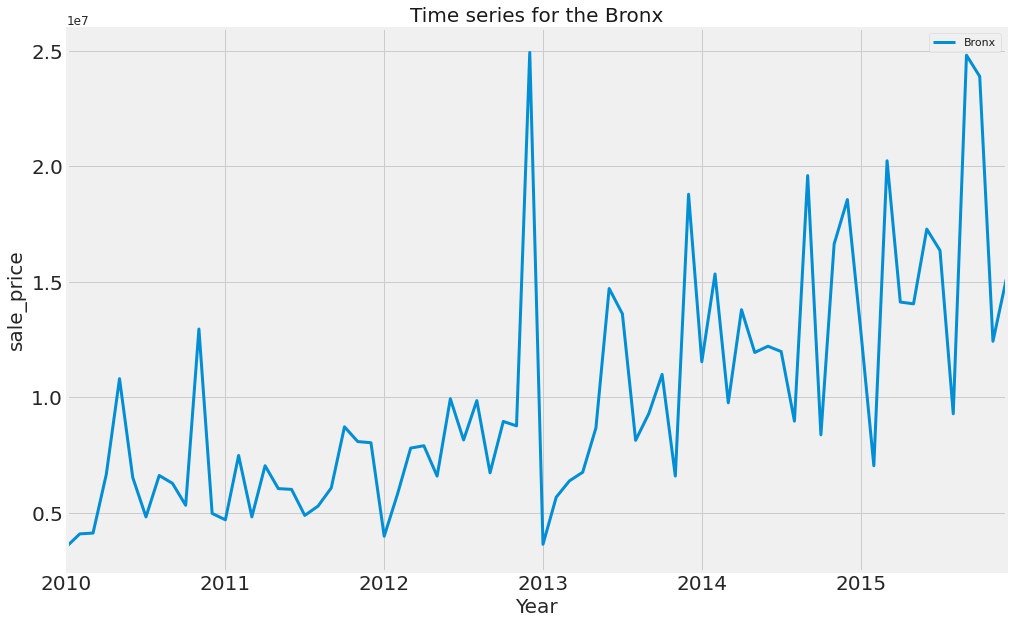

In [81]:
bronx.plot(figsize=(15,10), linewidth=3, fontsize=20)
plt.legend(['Bronx'], loc=1)
plt.ylabel('sale_price', fontsize=20);
plt.title("Time series for the Bronx",fontsize=20)
plt.xlabel('Year', fontsize=20);

**Plotting the time series for the Bronx and Brooklyn**

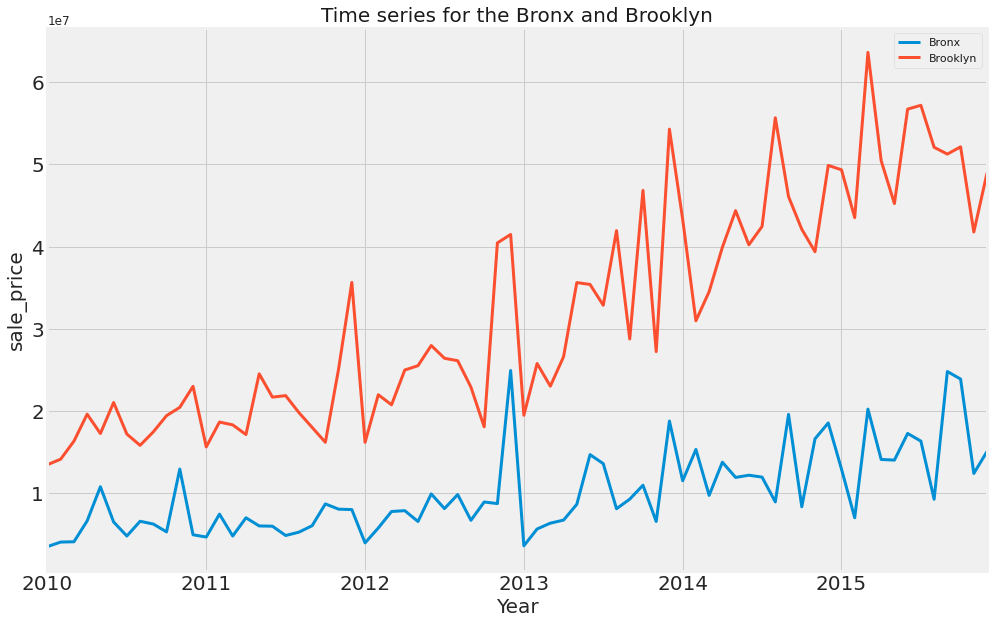

In [82]:

bronx.plot(figsize=(15,10), linewidth=3, fontsize=20)
brooklyn.plot(figsize=(15,10), linewidth=3, fontsize=20)
plt.legend(['Bronx', 'Brooklyn'], loc=1)
plt.ylabel('sale_price', fontsize=20);
plt.title("Time series for the Bronx and Brooklyn",fontsize=20)
plt.xlabel('Year', fontsize=20);

**Plotting the time series for the Bronx, Brooklyn and Manhattan**
<p> The sale prices for Manhattan are much higher than those for Brooklyn and the Bronx

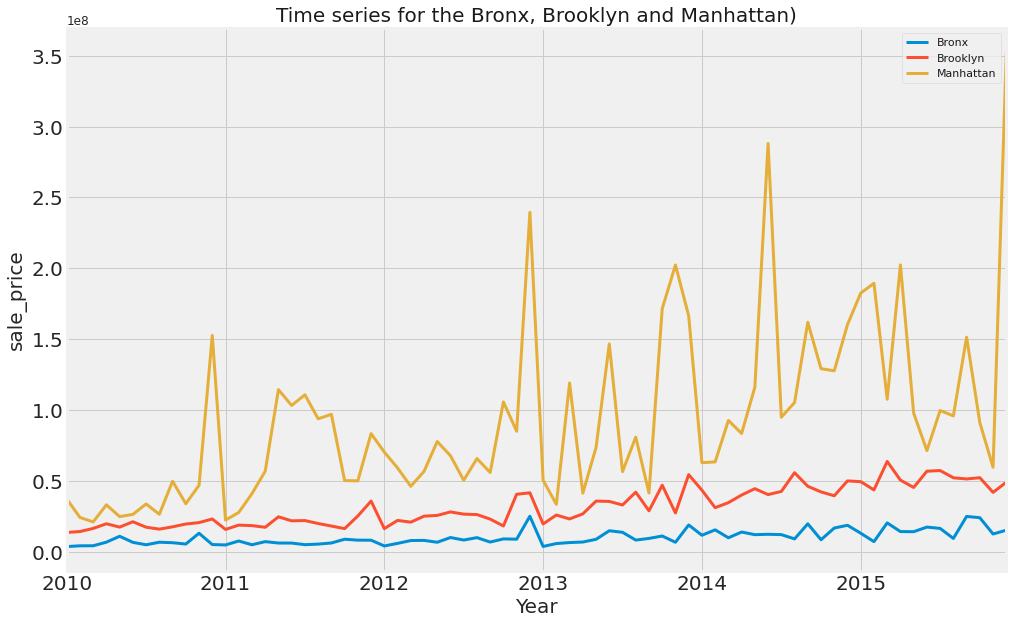

In [83]:


bronx.plot(figsize=(15,10), linewidth=3, fontsize=20)
brooklyn.plot(figsize=(15,10), linewidth=3, fontsize=20)
manhattan.plot(figsize=(15,10), linewidth=3, fontsize=20)
plt.legend(['Bronx', 'Brooklyn', 'Manhattan'], loc=1)
plt.ylabel('sale_price', fontsize=20);
plt.title("Time series for the Bronx, Brooklyn and Manhattan)",fontsize=20)
plt.xlabel('Year', fontsize=20);

**<h3> Identifying Trends in the Time Series</h3>**

The trend focuses on movement of the series to relatively higher or lower values over a long period of time.The trend analysis takes out the aspects of seasonality and noise. I used the rolling average method where basically, for every time point, you take the average of the points on either side of it.

**Brookly and Bronx Trend Analysis**

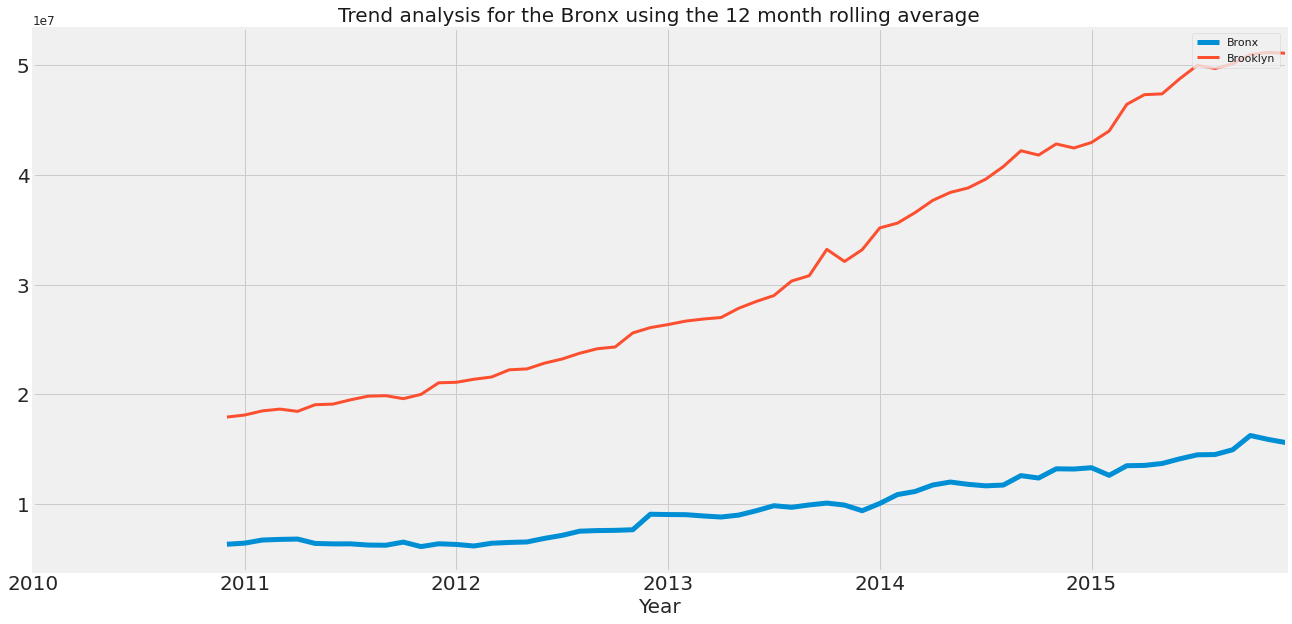

In [84]:
bronx.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
brooklyn.rolling(12).mean().plot(figsize=(20,10), linewidth=3, fontsize=20)
plt.legend(['Bronx', 'Brooklyn'], loc=1)
plt.title("Trend analysis for the Bronx using the 12 month rolling average",fontsize=20)
plt.xlabel('Year', fontsize=20);

I observed that for Brooklyn and the Bronx, the trend increases over the years.

**Brookly, Bronx and Manhattan Trend Analysis**

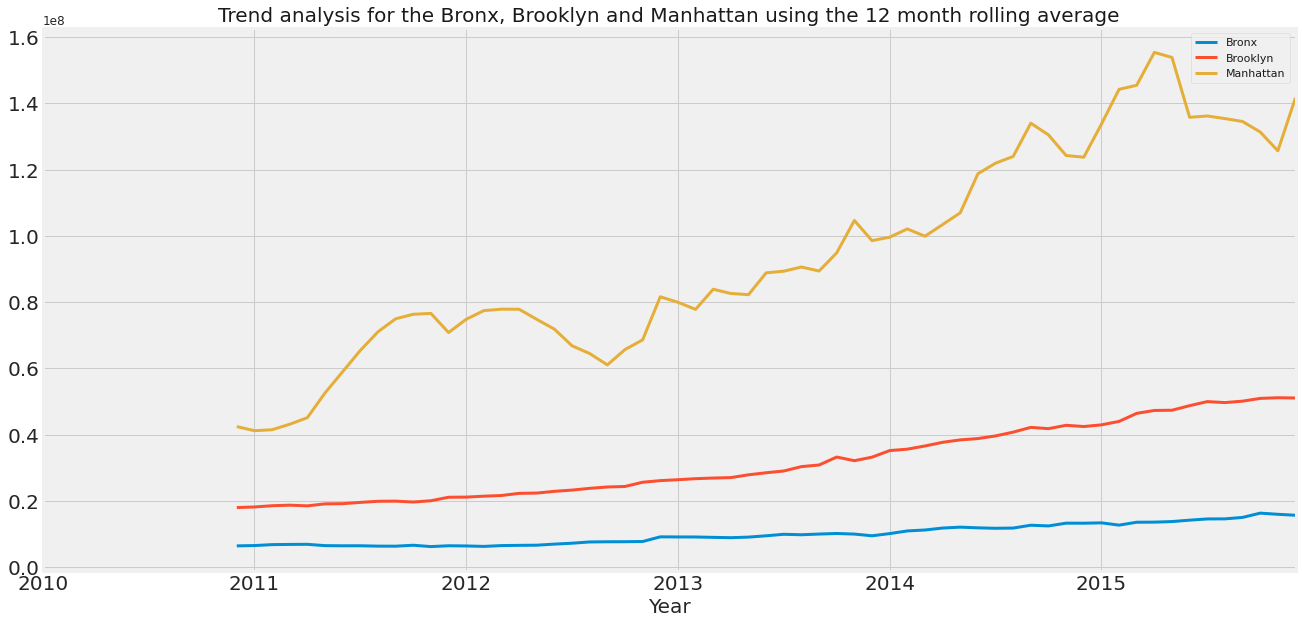

In [85]:
bronx.rolling(12).mean().plot(figsize=(20,10), linewidth=3, fontsize=20)
brooklyn.rolling(12).mean().plot(figsize=(20,10), linewidth=3, fontsize=20)
manhattan.rolling(12).mean().plot(figsize=(20,10), linewidth=3, fontsize=20)
plt.legend(['Bronx', 'Brooklyn', 'Manhattan'], loc=1)
plt.title("Trend analysis for the Bronx, Brooklyn and Manhattan using the 12 month rolling average",fontsize=20)
plt.xlabel('Year', fontsize=20);

The trend for Brooklyn and the Bronx is similar to that of Manhattan the quanities in Manhattan are significantly higher and the rate of change in the trend in Manhattan is also much higher than Brooklyn and the Bronx.

**<h3> Identifying Seasonality in the Time Series</h3>**

**Bronx Seasonality Analysis**

The method used for observing the seasonal trend was by removing the trend in order to investigate the seasonality. I used the method of first order differencing( basically looking at the difference between successive data points)

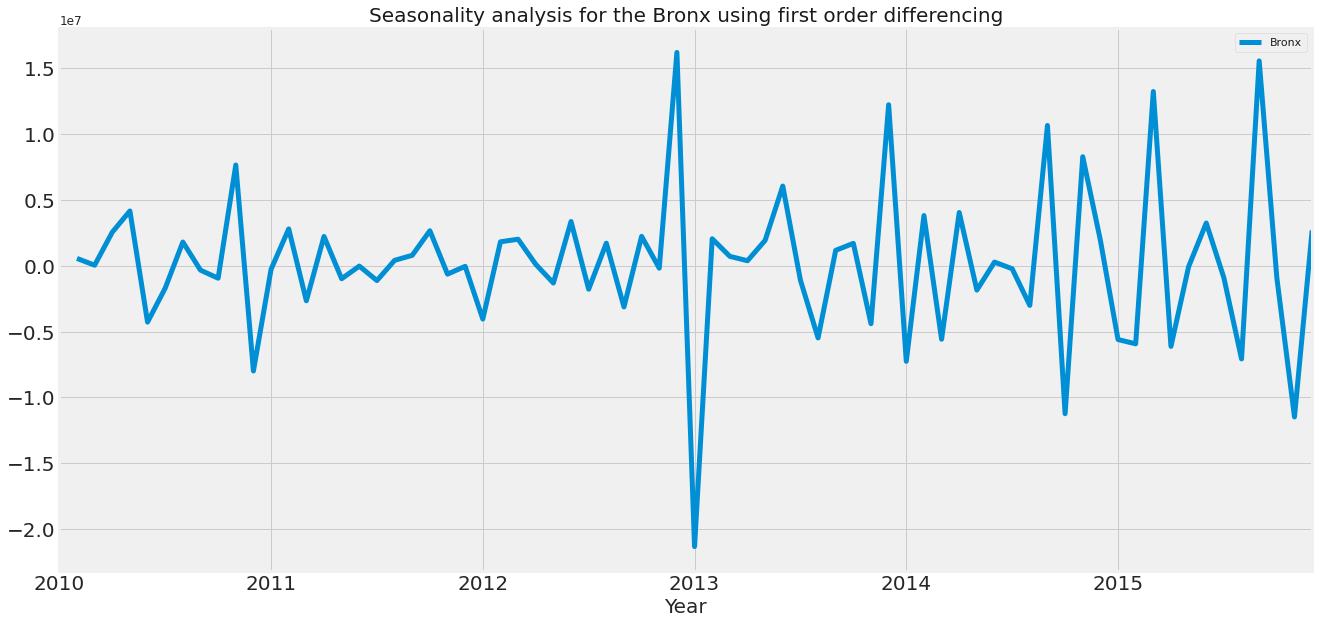

In [86]:
bronx.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.legend(['Bronx'], loc=1)
plt.title("Seasonality analysis for the Bronx using first order differencing",fontsize=20)
plt.xlabel('Year', fontsize=20);

The results show an interesting pattern. The highest uptrend is seen towards the end of the year( around the months of August to December) and the highest uptrend is towards the beginning of every year. The other observation is that the lowest downtrend for every year usually follows the highest uptrend. The question then is whether or not the pattern is consistent with the other boroughs. 

**Brookly and Bronx Seasonality Analysis**

With a few exceptions, the results are consistent for the Bronx and Brooklyn.

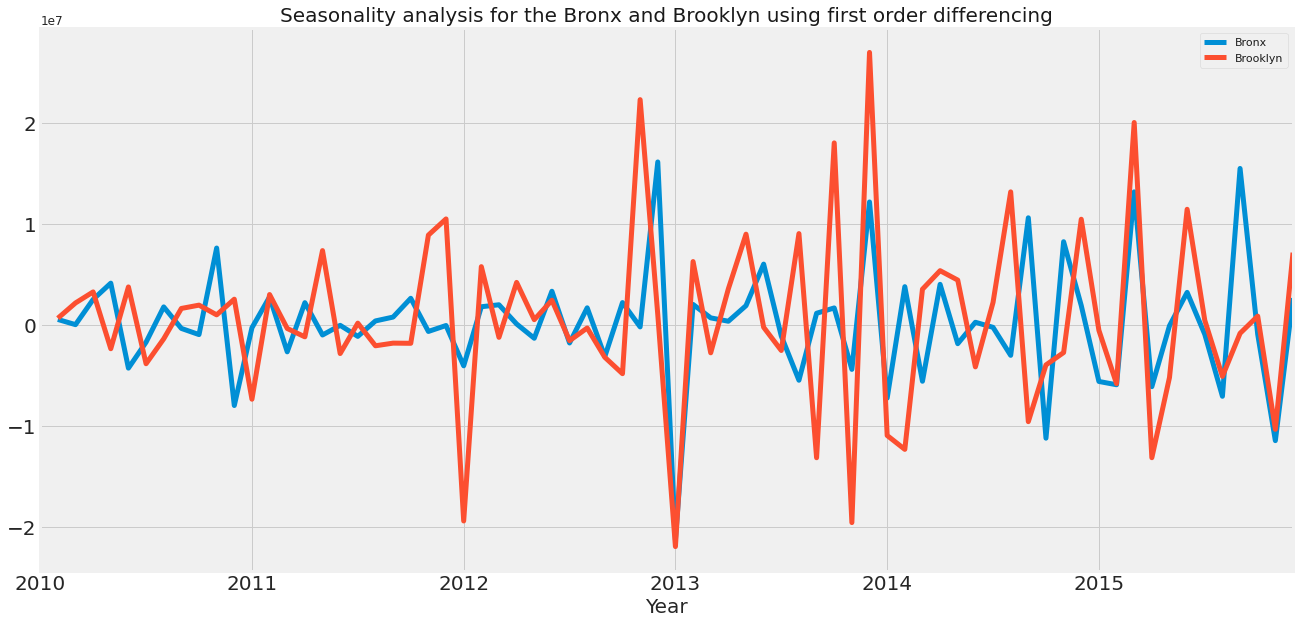

In [87]:
#First order differencing
 #Another way: Differencing(looking only at the difference between one data point and the one before it)
bronx.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
brooklyn.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.legend(['Bronx', 'Brooklyn'], loc=1)
plt.title("Seasonality analysis for the Bronx and Brooklyn using first order differencing",fontsize=20)
plt.xlabel('Year', fontsize=20);


**Brookly, Bronx and Manhattan Seasonality Analysis**

Similarly, even for Manhattan, the highest upward peak happens towards the end of the year and the highest downward peak happens close to the beginning of the year. 2014-2015 is the most significant exception to this.

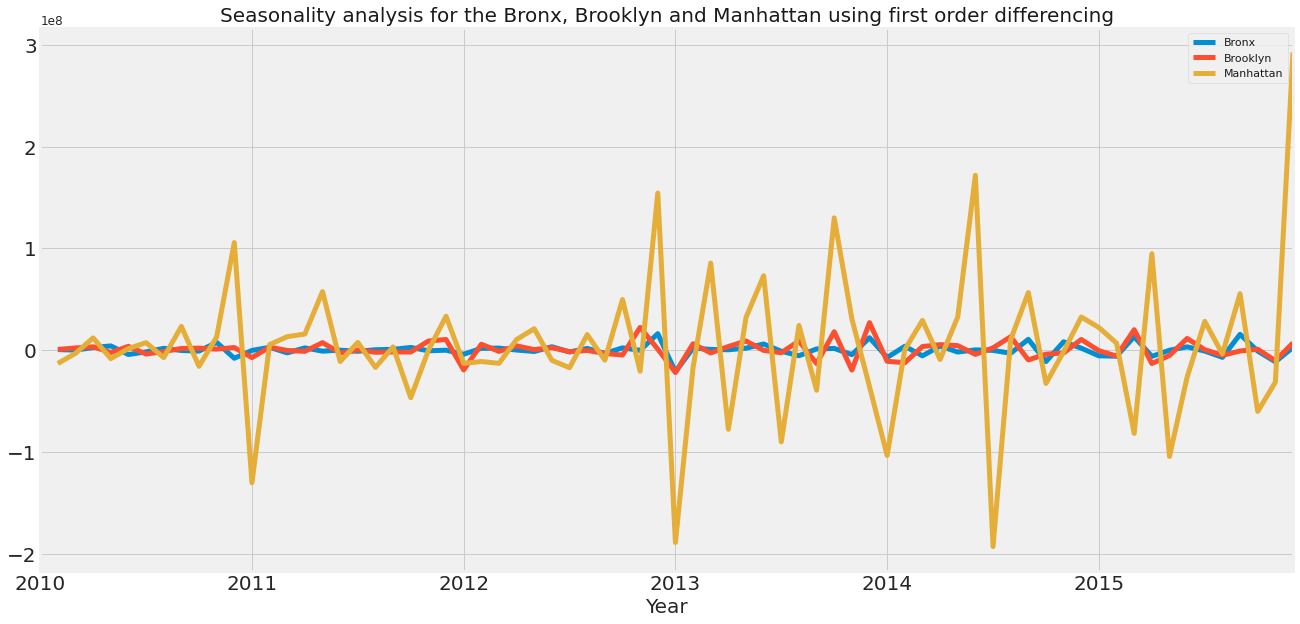

In [88]:
 #Another way: Differencing(looking only at the difference between one data point and the one before it)
bronx.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
brooklyn.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
manhattan.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.legend(['Bronx', 'Brooklyn', 'Manhattan'], loc=1)
plt.title("Seasonality analysis for the Bronx, Brooklyn and Manhattan using first order differencing",fontsize=20)
plt.xlabel('Year', fontsize=20);

**<h3>Periodicity and Autocorrelation.</h3>**

With autocorrelation, we are looking at how the time series is correlated with itself and the lag.If there's a spike in the autocorrelation every 12 months, that means that the pattern is significant and whether or not it is recurrent.The Bronx and Manhattan seemed to have a stronger autocorrelation compared to Brooklyn.

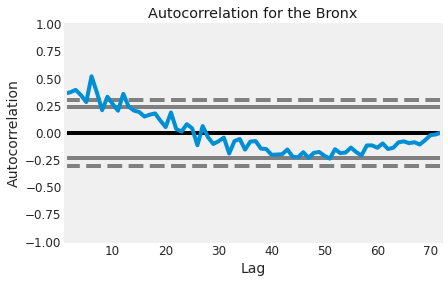

In [89]:
#plotting the autocorrelation for the Bronx
pd.plotting.autocorrelation_plot(bronx);
plt.title("Autocorrelation for the Bronx");

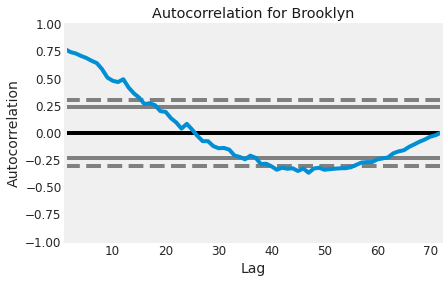

In [90]:
#plotting the autocorrelation for Brooklyn
pd.plotting.autocorrelation_plot(brooklyn);
plt.title("Autocorrelation for Brooklyn");

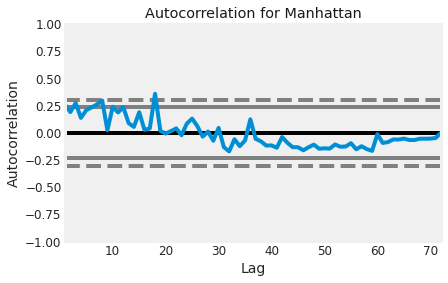

In [91]:
#plotting the autocorrelation for Manhattan
pd.plotting.autocorrelation_plot(manhattan);
plt.title("Autocorrelation for Manhattan");

**<h2>Unsupervised Learning</h2>**

I used unsupervised learning to get a better insight into the trends observed in the time series analysis, to figure out what clusters exist, what the composition of these clusters could be, and how significant they are to the patterns in the time series analysis.

**Hierarchical clustering**

In order understand whether HCA would be effective in generating meaningful clusters, I begun by generating a dendogram to investigate whether there are distinct clusters. 

In [0]:
property_df01=property_df51.copy()

I subsampled the dataset to only use 10% of the initial dataset for HCA because the machine kept crashing when I tried to draw the dendogram or do any hierarchical clustering of any kind due to insufficient RAM.

In [93]:
   #subsample the data to obtain only 25&
X_sample=property_df01.sample(frac =.10) 
X_sample.shape

(6961, 14)

In [0]:
scaler = StandardScaler()
X_sam_std = scaler.fit_transform(X_sample)

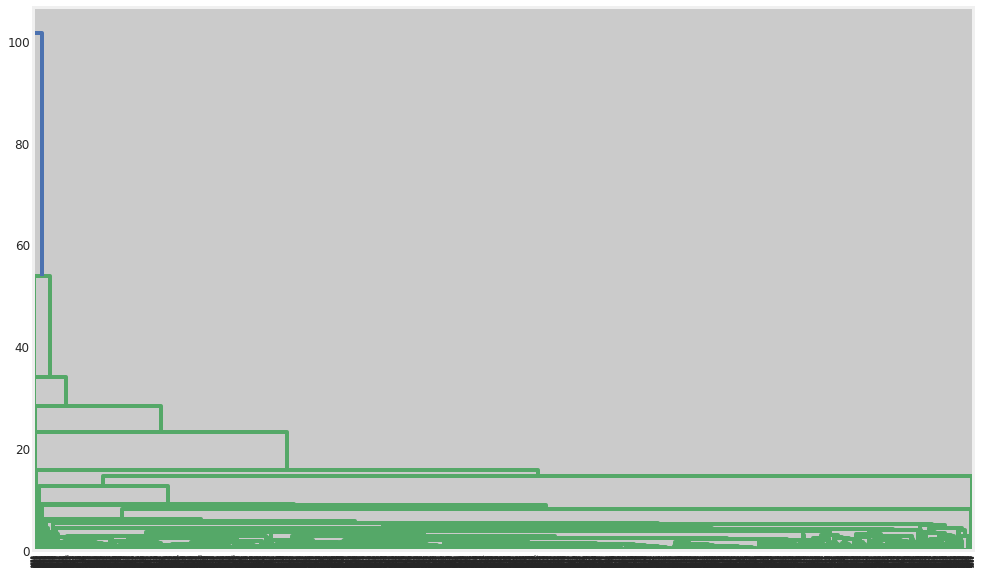

In [0]:
#Dendogram
plt.figure(figsize=(15,10))
dendrogram(linkage(X_sam_std, method='average'))
plt.show()

What the dendogram shows is that the HCA method would not be suitable because it was unable to come out with distinct clusters. This leaves us with other methods like DBCSCAN and K_means. GMM would not be suitable as the features are not normally distributed.

**DBSCAN**

I begin by standardizing the features

In [0]:
X = property_df01

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [96]:
X.shape

(69608, 14)

I used the DBSCAN first because its helpful in figuring out the number of clusters. DBSCAN has 2 hyperparameters; epsilon and minpoints. To find the eps, I used the KNN plot to generate the elbow curve below, which I can then read off the optimum eps from.

In [0]:

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_std)
distances, indices = nbrs.kneighbors(X_std)

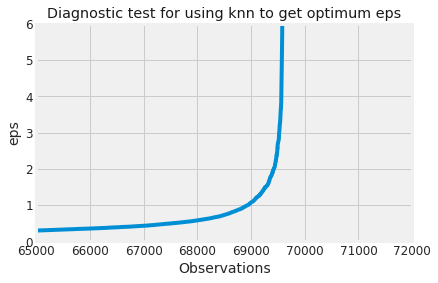

In [0]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlim(65000, 72000)
plt.ylim(0, 6)
plt.xlabel("Observations")
plt.ylabel("eps")
plt.title('Diagnostic test for using knn to get optimum eps')
plt.show()

The eps value is 1.4 from the elbow curve.

Knowing the eps, I used DBSCAN and the fixed eps to iterate over different min samples to figure out which one performed best by looking at the silhouette score and also to obtain the number of clusters to use.

In [0]:
for x in [ 13, 16, 21,26, 40, 60, 80, 100]:
  db = DBSCAN(eps=1.4, min_samples=x, n_jobs=-1)
  clusters=db.fit_predict(X_std)
  print("The silhouette score of the DBSCAN solution with min_samples= {} is : {}"
      .format(x,metrics.silhouette_score(X_std, clusters, metric='euclidean')))
  print("The number of clusters for this solution is : {}.".format(len(np.unique(clusters))))

The silhouette score of the DBSCAN solution with min_samples= 13 is : 0.4464845873942962
The number of clusters for this solution is : 6.
The silhouette score of the DBSCAN solution with min_samples= 16 is : 0.44623987771857065
The number of clusters for this solution is : 6.
The silhouette score of the DBSCAN solution with min_samples= 21 is : 0.4482627608857465
The number of clusters for this solution is : 9.
The silhouette score of the DBSCAN solution with min_samples= 26 is : 0.4471012070865813
The number of clusters for this solution is : 7.
The silhouette score of the DBSCAN solution with min_samples= 40 is : 0.44549223174931335
The number of clusters for this solution is : 6.
The silhouette score of the DBSCAN solution with min_samples= 60 is : 0.44489367830445625
The number of clusters for this solution is : 5.
The silhouette score of the DBSCAN solution with min_samples= 80 is : 0.44438708514529607
The number of clusters for this solution is : 5.
The silhouette score of the DB

The optimum number of clusters is 9 with min samples being 12, silhouette score is 0.45 and eps is 1.4

In [97]:
db = DBSCAN(eps=1.4, min_samples=21)
clusters=db.fit_predict(X_std)
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("The number of clusters is : {}.".format(len(np.unique(clusters))))
clusters1 = db.labels_

The silhouette score of the DBSCAN solution: 0.4482627608857465
The number of clusters is : 9.


In [0]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

The vectorization shows that there may be only 3 distinct clusters.

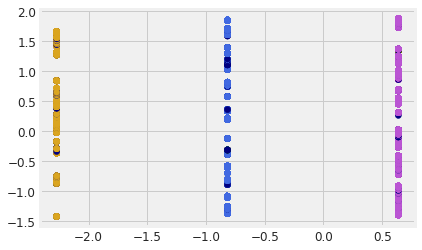

In [0]:
plt.scatter(X_std[:,0], X_std[:,1], c=vectorizer(clusters1));
plt.title("Vectorization Plot")

In [0]:
#what the clusters mean
X['dbscan']=db.labels_

**What do the clusters mean?**

To uderstand the significance of the clusters, I used the dbscan to create cluster labels and add an additional feature with the labels. I then used visualizatuions to compare categorical modifications of a few selected features. The features selected were the zip code, gross square feet, year built, residential units, sale price.

**Zip Code**

In [0]:
property_df00=property_df51.copy()

In [0]:
property_df00['zip_code'].min(),property_df00['zip_code'].max()

(10001.0, 11416.0)

In [0]:
def zip_code(x):
    if x<=10200:
        return "zip code 10,000 to 10,200"   
    elif x<=10400:
        return "zip code 10,200 to 10,400"  
    elif x<=10600:
        return "zip code 10,400 to 10,600"
    elif x<=10800:
        return "zip code 10,600 to 10,800"
    elif x<=11000:
        return "zip code 10,800 to 11,000"
    elif x<=11200:
        return "zip code 11,000 to 11,200"         
    else:
        return "zip code 11,200 to 11416"

In [0]:
property_df00["zip"] = property_df00['zip_code'].apply(zip_code)

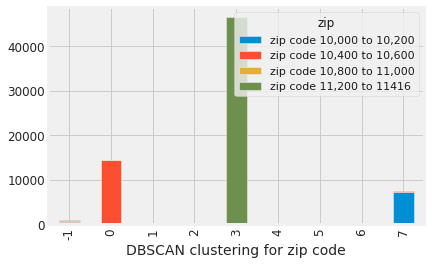

In [0]:
pd.crosstab(X['dbscan'],property_df00["zip"]).plot.bar(stacked=True)
plt.xlabel('DBSCAN clustering for zip code')
plt.show()

**Gross Square Feet**

In [0]:
property_df00['gross_square_feet'].min(),property_df00['gross_square_feet'].max()

(1.0, 8942176.0)

In [0]:
def gsqf(x):
    if x<=1000000:
        return "1 to 1 million sqft"   
    elif x<=2000000:
        return "1 million to 2 million sqft"  
    elif x<=3000000:
        return "2 million to 3 million sqft" 
    elif x<=4000000:
        return "3 million to 4 million sqft" 
    elif x<=5000000:
        return "4 million to 5 million sqft"
    elif x<=6000000:
        return "5 million to 6 million sqft"
    elif x<=7000000:
        return "6 million to 7 million sqft"
    elif x<=8000000:
        return "7 million to 8 million sqft"                    
    else:
        return "above 8 million sqft" 

In [0]:
property_df00["gsqft"] = property_df00['gross_square_feet'].apply(gsqf)

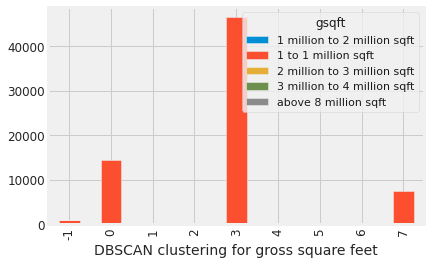

In [0]:
pd.crosstab(X['dbscan'],property_df00["gsqft"]).plot.bar(stacked=True)
plt.xlabel('DBSCAN clustering for gross square feet')
plt.show()

**Year Built**

In [0]:
property_df00['year_built'].min(),property_df00['year_built'].max()

(1050.0, 2016.0)

In [0]:
def yearbuilt(x):
    if x<=1200:
        return "year 1050-1200"   
    elif x<=1300:
        return "year 1200-1300"  
    elif x<=1400:
        return "year 1300-1400" 
    elif x<=1500:
        return "year 1400-1500" 
    elif x<=1600:
        return "year 1500-1600"
    elif x<=1700:
        return "year 1600-1700"
    elif x<=1800:
        return "year 1700-1800"
    elif x<=1900:
        return "year 1800-1900"
    elif x<=2000:
        return "year 1900-2000"                     
    else:
        return "above year 2000"

In [0]:
property_df00["yearbuilt"] = property_df00['year_built'].apply(yearbuilt)

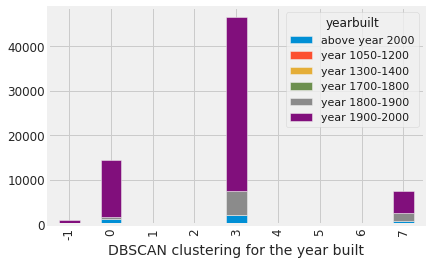

In [0]:
pd.crosstab(X['dbscan'],property_df00["yearbuilt"]).plot.bar(stacked=True)
plt.xlabel('DBSCAN clustering for the year built')
plt.show()

**Residential Units**

In [0]:
property_df00['residential_units'].min(),property_df00['residential_units'].max()

(0, 8759)

In [0]:
def residential(x):
    if x<=1000:
        return "less than 1,000 units"   
    elif x<=2000:
        return "1000-2000 units"  
    elif x<=3000:
        return "2000-3000 units"   
    elif x<=4000:
        return "3000-4000 units" 
    elif x<=5000:
        return "4000-5000 units"
    elif x<=6000:
        return "5000-6000 units"
    elif x<=6000:
        return "6000-7000 units"
    elif x<=7000:
        return "7000-8000 units"                    
    else:
        return "above 8000 units"

In [0]:
property_df00["residential"] = property_df00['residential_units'].apply(residential)

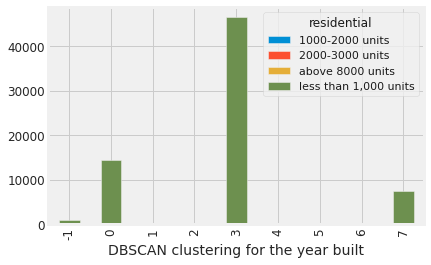

In [0]:
pd.crosstab(X['dbscan'],property_df00["residential"]).plot.bar(stacked=True)
plt.xlabel('DBSCAN clustering for the year built')
plt.show()

**Sale Price**

In [0]:
property_df00['sale_price'].min(),property_df00['sale_price'].max()

(100009.0, 4111111766.0)

In [0]:
def price(x):
    if x<=500000:
        return "$100k- $500k"   
    elif x<=999999:
        return "$500k-$1million"  
    elif x<=500000000:
        return "$1million-$500million"   
    elif x<=999999999:
        return "$500million-$1billion"
    else:
        return "above 1billion"

In [0]:
property_df00["price"] = property_df00['sale_price'].apply(price)

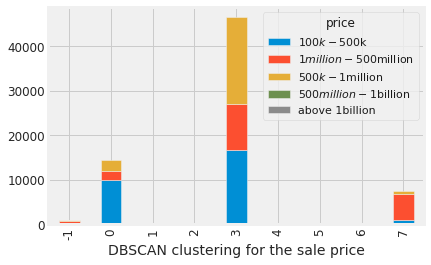

In [0]:
pd.crosstab(X['dbscan'],property_df00["price"]).plot.bar(stacked=True)
plt.xlabel('DBSCAN clustering for the sale price')
plt.show()

While the DBSCAN identified 9 clusters, the analysis shows that the most significant number of clusters are basically 3. After doing extensive research on factors such as the demographics, population, economics of New York City, I concluded that these labels most likely represent the boroughs. The cluster label 7 is most likely the Manhattan, cluster label 3 is Brooklyn and cluster label 0 is most likely the Bronx. For example, for the bar plot on the price, label 7 has most of the properties in the range of 1 million to 500 million which is the most expensive. From the time series, this is consistent with Manhattan. The cluster label 3 appears to have a mix of different price ranges and that's consistent with Broklyn. Finally cluster label 0 appears to be the Bronx and has th majority of property prices between 100,000 and 500,000. The most telling interpretation is with the zipcodes. For example, consistent with the bar plot the zipcode 11200 is in Brooklyn, zipcode 10000 is in Manhattan and 10400 is in Bronx. The other features when compared to the labels were also consistent.

**PCA**

PCA was not very useful in identifying distinct clusters.

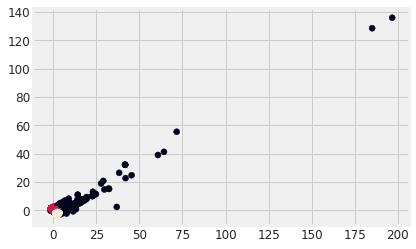

In [0]:
X_pca = PCA(2).fit_transform(X_std)
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters1)

**<h2>K-Means</h2>**

The results from DBSCAN were compared with the k-means clustering. K-means only requires the number of clusters as a hyperparameter. I already identified the number of clusters as 9. However, I will run other iterations of the k-means with other cluster numbers also just to makes sure that 9 is the optimum number.

In [109]:
cluster_numbers=[7,8,9,10,11,12]
kmeans_clusters=[]
for i in cluster_numbers:
 k_means=KMeans(n_clusters=i, random_state=455)
 y_pred=k_means.fit_predict(X_std)   
 kmeans_clusters.append(k_means.fit_predict(X_std))
 print("For number of clusters= {}".format(i))
 print("Silhouette score: {}".format(metrics.silhouette_score(X_std, y_pred, metric='euclidean')))
 print("CH score: {}".format(metrics.calinski_harabasz_score(X_std, y_pred)))

For number of clusters= 7
Silhouette score: 0.3193653644739544
CH score: 16890.391884481516
For number of clusters= 8
Silhouette score: 0.343658992396516
CH score: 17082.91800301037
For number of clusters= 9
Silhouette score: 0.3502129939248168
CH score: 17286.346165761912
For number of clusters= 10
Silhouette score: 0.3635212972620896
CH score: 18665.048217740758
For number of clusters= 11
Silhouette score: 0.366980030906412
CH score: 17810.85584574578
For number of clusters= 12
Silhouette score: 0.34560735323548936
CH score: 17950.44139042939


When I used the K-means the optimum number of clusters is 11 with a silhouette score of 0.367. This score is lower than the one from the DBSCAN where the silhouette score was 0.45 and the number of clusters was 9.

**<h2>Supervised Learning</h2>**

For the supervised learning, used the selectec features to predict the sale prices of properties. I began by dividing the data into the train set, test set and validation set.I used linear regression and random forest algorithms. For likear regression , I compared ridge regression and lasso regularization techniques to optimize the model through generalization. For the random forest, I used the param grid technique to obtain the hyperparameters to optimize the model.  

In [0]:
y=property_df01['sale_price']
X=property_df01.drop(['sale_price'], axis=1)
X['dbscan']=db.labels_
#Training, Validation and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=123)

In [100]:
X.shape, y.shape

((69608, 14), (69608,))

In [101]:
X_train.shape , y_train.shape

((39154, 14), (39154,))

In [102]:
X_test.shape , y_test.shape

((17402, 14), (17402,))

**Linear Regression**

Without Optimization

In [0]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_cv_scores = cross_val_score(lr, X, y, cv=5,scoring="neg_mean_absolute_error")
print('The AUC scores: ', lr_cv_scores)
print('Mean cross validation score: {:.3f}'.format(lr_cv_scores.mean()))

The AUC scores:  [ -3517824.797953    -1820122.112638    -1553855.23361581
  -1668570.72793551 -11965097.04442322]
Mean cross validation score: -4105093.983


 Ridge regression

In [0]:
 #Ridge regression
alphas=[np.power(10.0,p) for p in np.arange(-10,40,1)]
ridge_cv=RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, y_train)

y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

#predicting


print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model on the training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 10000000000000.0
R-squared of the model on the training set is: 0.5900056433613885
-----Test set statistics-----
R-squared of the model on the test set is: 0.5132398207082016
Mean absolute error of the prediction is: 2574678.0369376363
Mean squared error of the prediction is: 256896034725182.75
Root mean squared error of the prediction is: 16027976.6260493
Mean absolute percentage error of the prediction is: 439.82024309243917


Lasso Regression

In [0]:
#Lasso Regression
#Lasso regression
lasso_cv=LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

#predicting


print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model on the training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 1000000000.0
R-squared of the model on the training set is: 0.5957265678350863
-----Test set statistics-----
R-squared of the model on the test set is: 0.4572537604390214
Mean absolute error of the prediction is: 2724211.708430591
Mean squared error of the prediction is: 286443638442403.6
Root mean squared error of the prediction is: 16924645.888242494
Mean absolute percentage error of the prediction is: 487.55310068705893


The base model has MAE of 4.1e6. With ridgre regression regularization the MAE is 2.6e6 and with Lasso regression regularization the MAE is 2.7e6. Thus the linear regression with L2 regularization (Ridge regression ) performed best.

**<h3>Random Forest</h3>**

With random forest I used paranGrid to estimate the hyperparameters.

**Random Forest without optimization**

In [0]:
rfr.fit(X_train, y_train)
rf_cv_scores = cross_val_score(rfr, X, y, cv=5,scoring="neg_mean_absolute_error")

print('The MAE: ', rf_cv_scores)
print('Mean MAE: {:.3f}'.format(rf_cv_scores .mean()))

The MAE:  [-1528843.95256594  -536662.41904617  -496209.80695852  -603220.27732976
 -9276297.91085874]
Mean MAE: -2488246.873


**Random Forest with optimization**

1. n-estimators

-------------FITTING MODELS-------------


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-2)]: Done   4 out of   8 | elapsed:   40.1s remaining:   40.1s
[Parallel(n_jobs=-2)]: Done   5 out of   8 | elapsed:   53.9s remaining:   32.4s
[Parallel(n_jobs=-2)]: Done   6 out of   8 | elapsed:  2.6min remaining:   51.2s


-------------SCORING MODELS-------------


[Parallel(n_jobs=-2)]: Done   8 out of   8 | elapsed:  5.3min remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   8 out of   8 | elapsed:  5.3min finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   8 out of   8 | elapsed:   14.7s finished


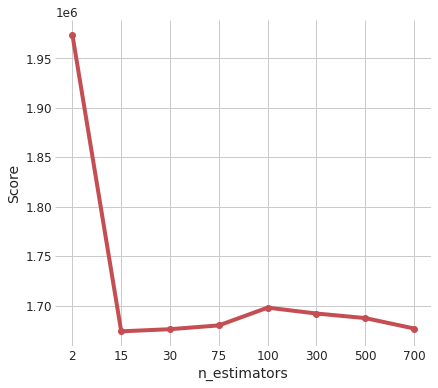

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False) 1973798.9727308766


In [0]:
#1. n-estimators
paramGrid = ParameterGrid({
    #n_estimators': [2, 15, 30, 75, 100, 300, 500, 600],
    'n_estimators': [2, 15, 30, 75, 100, 300, 500, 700],
    #'n_jobs': [-1],
    'random_state': [42]
})
best_model, best_score, all_models, all_scores = pf.bestFit(RandomForestRegressor(), paramGrid, X_train, y_train, X_val, y_val, metric=mean_absolute_error, n_jobs=-2)
print(best_model, best_score)

2- max features

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:   13.7s remaining:   34.2s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:   24.0s remaining:   32.0s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:   57.8s remaining:   43.3s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:  1.1min remaining:   26.0s


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:  3.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:  3.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:   10.7s finished


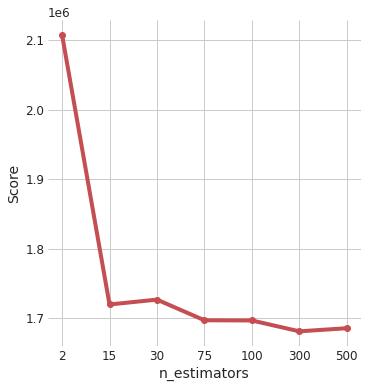

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False) 2107754.080789707


In [0]:
#1. n-estimators
paramGrid = ParameterGrid({
    #n_estimators': [2, 15, 30, 75, 100, 300, 500, 600],
    'n_estimators': [2, 15, 30, 75, 100, 300, 500],
    'n_jobs': [-1],
    'random_state': [42]
})
best_model, best_score, all_models, all_scores = pf.bestFit(RandomForestRegressor(n_estimators=700), paramGrid, X_train, y_train, X_val, y_val, metric=mean_absolute_error)
print(best_model, best_score)

-------------FITTING MODELS-------------


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 out of   5 | elapsed:  1.9min remaining:  2.8min
[Parallel(n_jobs=-2)]: Done   3 out of   5 | elapsed:  5.4min remaining:  3.6min


-------------SCORING MODELS-------------


[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:  6.9min remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:  6.9min finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:   19.6s finished


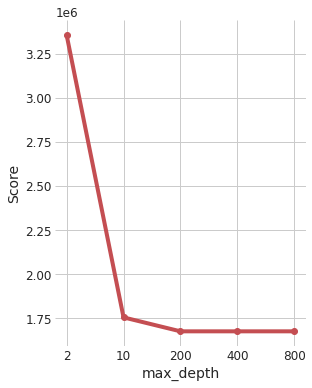

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False) 3359435.6535006063


In [0]:
#2. max depth
paramGrid = ParameterGrid({
    'max_depth' :[2, 10 ,200, 400, 800],
    #'n_jobs': [-1],
    'random_state': [42]
})
best_model, best_score, all_models, all_scores = pf.bestFit(RandomForestRegressor(n_estimators=700, max_features=500), paramGrid, X_train, y_train, X_val, y_val, metric=mean_absolute_error, n_jobs=-2)
print(best_model, best_score)

-------------FITTING MODELS-------------


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:  2.0min remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   2 out of   2 | elapsed:  4.3min remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   3 out of   3 | elapsed:  6.8min remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   4 out of   4 | elapsed:  9.4min remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed: 12.2min remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   6 out of   6 | elapsed: 15.3min remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   7 out of   7 | elapsed: 18.5min remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   8 out of   8 | elapsed: 21.8min remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   9 out of   9 | elapsed: 25.5min remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   9 out of   9 | elapsed: 25.5min finished
[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


-------------SCORING MODELS-------------
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.
This model/metric cannot use predict_proba. Using predict for scoring instead.


[Parallel(n_jobs=-2)]: Done   9 out of   9 | elapsed:   29.5s finished


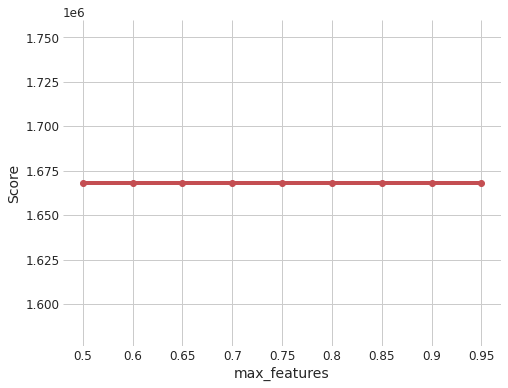

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=200, max_features=0.95, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False) 1668007.8576959898


In [0]:
#3.max features
paramGrid = ParameterGrid({
    #n_estimators': [2, 15, 30, 75, 100, 300, 500, 600],
    #'max_features': ['auto', 'sqrt', 'log2', 0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95],
    'max_features': [ 0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95],
    #'n_jobs': [-1],
    'random_state': [42]
})
best_model, best_score, all_models, all_scores = pf.bestFit(RandomForestRegressor(n_estimators=700,max_depth=200), paramGrid, X_train, y_train, X_val, y_val, metric=mean_absolute_error, n_jobs=-2)
print(best_model, best_score)

In [0]:
rfr = RandomForestRegressor(n_estimators=500, max_features="sqrt", max_depth=800, random_state=400)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=800, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=400, verbose=0, warm_start=False)

Predicting the training set

In [0]:
rf_X_train=rfr.predict(X_train)
print ('MAE on training set',mean_absolute_error(y_train,rf_X_train))

MAE on training set 611404.016716368


Predicting the test set

In [0]:
rf_X_test=rfr.predict(X_test)
print ('MAE on testing set',mean_absolute_error(y_test,rf_X_test))

MAE on testing set 1585286.0980492576


Predicting the validation set

In [0]:
rf_X_val=rfr.predict(X_val)
print ('MAE on validation set',mean_absolute_error(y_val,rf_X_val))

MAE on validation set 1579874.7725590582


In [0]:
#The MAE on the training set is 6.1e5, the MAE on the testing set is 1.6e6 and the MAE on the validation set is 1.6e6.

The observation is that there is overfitting of the model and the MAE is is much higher on the test set and validation set compared to the training set MAE. It is possible that param Grid had not reached its optimum value but the algorithm requires a huge amount of RAM which my machine did not have , and itkept crashing, so I had to limit the values. I will review the subject in the future when I have a machine with higher RAM and CPU strength. Also it seems like max features was not optimized as the line is just straight. It would be easier to investigate this if I had a better processing system so I could figure out the reason for this without worrying about high wait times and the computer constantly crashing. I would also try other algorithms like Gradient Boost Machine.
 <p>However in general (and as expected), random forest performed better than linear regression with MAE of 1.6e6 on the validation set as opposed to 2.7e6 for the linear regression. Also these numbers are huge but consider that the mean sale price for the entire dataset is 3.0e6. 


**Feature Importance Analysis:**


I performed feature importance analysis to invesigate which feature were more impactful in the prediction of the target variable.

<Figure size 720x360 with 0 Axes>

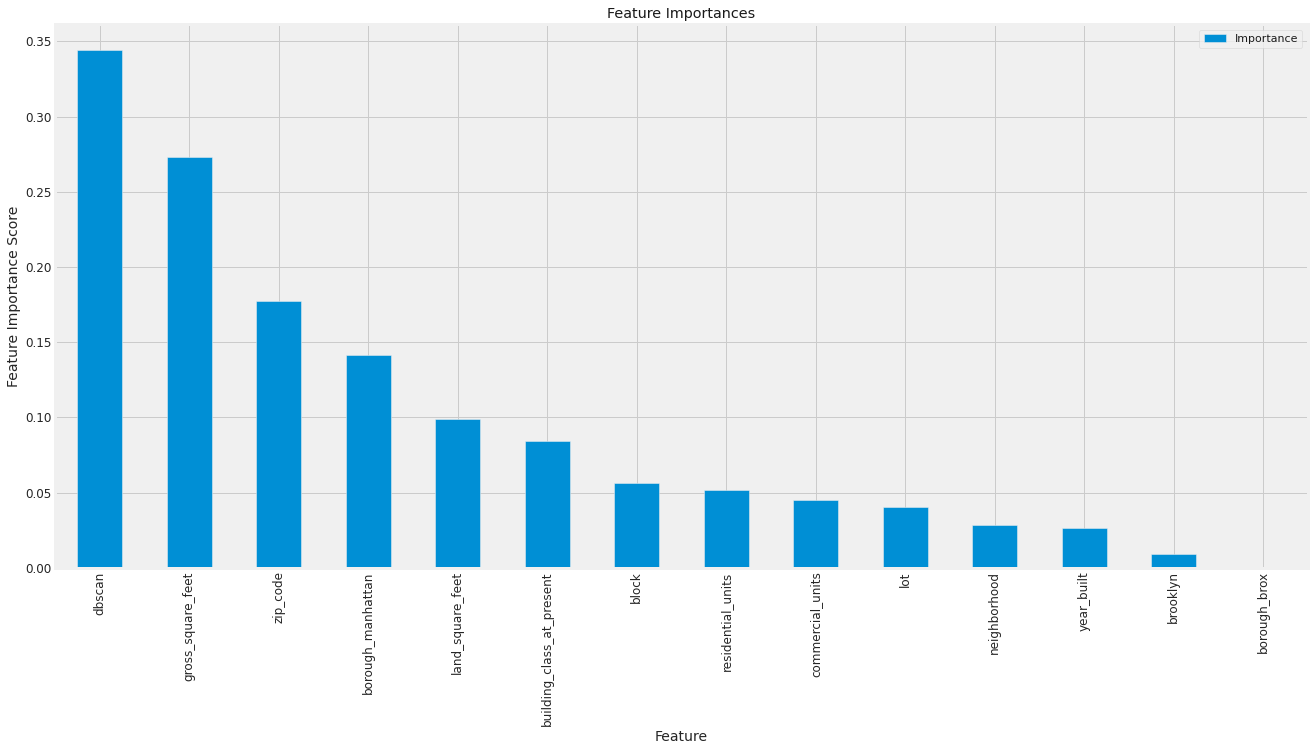

In [0]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rfr, X_train, y_train):
    return r2_score(y_train, rfr.predict(X_train))

plt.figure(figsize=(10,5))
perm_imp_rfpimp = permutation_importances(rfr, X_train, y_train, r2)
perm_imp_rfpimp.plot(kind='bar', title='Feature Importances',figsize=(20,10) )
plt.ylabel('Feature Importance Score')
plt.show()

The main 5 features influencing the model are the DBSCAN labels, gross square feet, zip code, manhattan borough, land square feet.

In [0]:
import statsmodels.formula.api as sm
import statsmodels.api as sm

In [105]:
X3=X[['dbscan','gross_square_feet','zip_code','borough_manhattan','land_square_feet','building_class_at_present']]
# We need to manually add a constant
# in statsmodels' sm
X3 = sm.add_constant(X3)
results = sm.OLS(y, X3).fit()


print(results.summary())
print(results.conf_int())

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                 2.545e+04
Date:                Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                        16:32:19   Log-Likelihood:            -1.2564e+06
No. Observations:               69608   AIC:                         2.513e+06
Df Residuals:                   69601   BIC:                         2.513e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [0]:
#This shows that the feature importance is basically explained by 2 features: the gross square feet and the land square feet. Thim minimum number 
#of features basically explains why the accuracy is only 0.5.

**<h3>Analysis:</h3>**
<p>This study was aimed at looking at time series analysis of properties in New York. I narrowed down the scope and looked at 3 of the boroughs Manhattan,Bronk and Brooklyn. I perfomed the data wrangling process including dealing with missing values, outliers analysis, converting between data types, feature engineering, missing at random, Variance Inflation, factors, heatmap visualizations, etc.
The time series covers a period of 6 years from 2010 to 2015.
I looked at the trend , seasonality and autocorrelation.For the trend, I used the method of 12 month rolling average to take out the aspects of seasonality and noise. For the seasonality, I used the first order differencing method. I also used the autocorrelation to understand if these patters were significant and/or recurrent. One stark conclusion was that in general the highest upward peak was towards the end of the year, and it was followed by the lowest downward peak. This is very telling information for potential investors and people interested in the property market.
On the trend, Manhattan had a significantly larger difference in prices compare to Bronx and Brooklyn. However, the trends of all 3 boroughs are on the rise over the period investigated. 
<p>I performed unsupervised learning using DBSCAN and K-means. I did not go forward with hierarchical clustering because plotting a dendogram showed that it was unable to find distinct clusters. I also did not go ahead with GMM as the features did not follow a normal distribution. When I used the K-means the optimum number of clusters is 11 with a silhouette score of 0.367. This score is lower than the one from the DBSCAN where the silhouette score was 0.448 and the number of clusters was 9. I also used PCA for dimension reduction to visualize the distinct clusters but it didn't provide any significant additional information. I also used the vecorization technique for the same and I observed 3 distuinct clusters. Using the labels from the DBSCAN, I investigated what the clusters could potentially mean. After doing extensive research on factors such as the demographics, population, economics of New York City, I concluded that these labels most likely represent the boroughs. The cluster label 7 is most likely the Manhattan, cluster label 3 is Brooklyn and cluster label 0 is most likely the Bronx.
<p> I then used supervised learning to predict the sale price. The data is skewed with a high amount of outliers and that was put into consideration. I used linear regression and random forest for the modeling. For the linear regression I used ridge and lasso for generalization of the model. Without optimization, the MAE was 4.1e6 The ridge regression has MAE of 2.6e6 with cross validation. The MaE is 2.7e6. Thus the linear regression with the ridge regression regularization parameter performed best. For the random forest, I used the param grid technique to obtain the hyperparameters to optimize the model. The MAE on the training set is 6.1e5, the MAE on the testing set is 1.6e6 and the MAE on the validation set is 1.6e6. Also, overall, the optimized models performed better than the base models. There was over fitting potentially because the I was running on insufficient RAM and I could only run up to a certain number before the system could crash. Therefore, the hyperparameter optimization has room for improvement.   
<p> I also looked at the feature importance analysis and concluded that the main features responsible for explaining the variance in the model are the DBSCAN labels, gross square feet, zip code, land square feet and manhattan borough. I also used the OLS statistical analysis to quantify the coefficients.
<p>For future analysis, I will look at a combination of time series and geostatistics to further break down the patters by zip code. My method provides a smart way to understand property prices and make judicious decision on investment.


**<h3>Challenges</h3>**
<p>The main challenge was lack of domain expertise in the property sales and in the geostatistics of New York City. I also faced a challenge of data quality that was out of my control. For example, over 50% of the data in the "gross square feet" and "land square feet" features were having a value zero. Obviously this is impossible. These features are important so removing them was off the table. Dealing with such a data integrity challenge without a chance to question the source was a quandary. Further more the models required high processing power and I ran into incessant memory failures due to lack of a high RAM pc.</p>